<a href="https://colab.research.google.com/github/LarissaDG/ICCC/blob/main/ICCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

In [2]:
import os
import math
import gdown
import shutil
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import Image

import scipy.stats as stats
from scipy.stats import  norm, pearsonr, spearmanr, ttest_ind, mannwhitneyu, f_oneway, kurtosis, skew

#Baixar o APDDv2 e suas dependências

In [3]:
!git clone https://github.com/BestiVictory/APDDv2.git

Cloning into 'APDDv2'...
remote: Enumerating objects: 174, done.
remote: Total 174 (delta 0), reused 0 (delta 0), pack-reused 174 (from 1)
Receiving objects: 100% (174/174), 18.31 MiB | 24.16 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [4]:
# Defina o diretório temporário onde os arquivos serão armazenados
DATA_FILES = '/content/APDDv2'
OUTPUT_ZIP = f"{DATA_FILES}/APDDv2-images.zip"
UNZIPPED_DIR = f"{DATA_FILES}/APDDv2images"
FILE_IMG_ID = "1ap5dhuEgpPC5PrJozAu2VFmUNIRZrar2"  # ID do arquivo do Google Drive

# Função para fazer o download do arquivo usando gdown
def download_file_from_google_drive(file_id, destination):
    url = f"https://drive.google.com/uc?export=download&id={file_id}"
    gdown.download(url, destination, quiet=False)

# Verifique se o diretório de imagens já foi extraído
if not os.path.isdir(UNZIPPED_DIR):
    print("Baixando o arquivo ZIP...")
    # Crie o diretório se não existir
    os.makedirs(DATA_FILES, exist_ok=True)

    # Baixar o arquivo do Google Drive
    download_file_from_google_drive(FILE_IMG_ID, OUTPUT_ZIP)

    print("Descompactando o arquivo ZIP...")
    os.makedirs(UNZIPPED_DIR, exist_ok=True)
    with zipfile.ZipFile(OUTPUT_ZIP, 'r') as zip_ref:
        zip_ref.extractall(UNZIPPED_DIR)
else:
    print("A pasta já existe. Nenhuma extração necessária.")

Baixando o arquivo ZIP...


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1ap5dhuEgpPC5PrJozAu2VFmUNIRZrar2
From (redirected): https://drive.google.com/uc?export=download&id=1ap5dhuEgpPC5PrJozAu2VFmUNIRZrar2&confirm=t&uuid=8f50ae99-13e5-446d-aa82-38083a3e7373
To: /content/APDDv2/APDDv2-images.zip
100%|██████████| 7.05G/7.05G [01:36<00:00, 73.3MB/s]


Descompactando o arquivo ZIP...


In [5]:
!gdown 1eumVJwL8PDajCk9UfMgm7SJjiYyD5C4d

Downloading...
From (original): https://drive.google.com/uc?id=1eumVJwL8PDajCk9UfMgm7SJjiYyD5C4d
From (redirected): https://drive.google.com/uc?id=1eumVJwL8PDajCk9UfMgm7SJjiYyD5C4d&confirm=t&uuid=feb46ab3-d1e9-459e-b040-908c2bb583fe
To: /content/APDDv2images.zip
100% 7.05G/7.05G [01:27<00:00, 80.4MB/s]


In [6]:
!unzip '/content/APDDv2images.zip' -d '/content/APDDv2'

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/APDDv2/APDDv2images/7f28d66cc1ba471aa77b241f3fb51eb5.jpg  
  inflating: /content/APDDv2/APDDv2images/7f3a96663c7c4b2fb67d1dabd4fa04e6.jpg  
  inflating: /content/APDDv2/APDDv2images/7f3bbe42d30d47f48653e17e5ebd21b8.jpg  
  inflating: /content/APDDv2/APDDv2images/7f3bd96f38c44e839b971fafed17b396.jpg  
  inflating: /content/APDDv2/APDDv2images/7f3d500ccce74ab4bef04316a6fdf41b.png  
  inflating: /content/APDDv2/APDDv2images/7f49574980eb456db02594bb2fd7bedf.jpg  
  inflating: /content/APDDv2/APDDv2images/7f5f548aa05140fd82c8b8e0966d8a34.jpg  
  inflating: /content/APDDv2/APDDv2images/7f6c954a1ca44328986a5fc9e06d55ee.jpg  
  inflating: /content/APDDv2/APDDv2images/7f6ea5c9602344179bf0fb190d3b2ffc.jpg  
  inflating: /content/APDDv2/APDDv2images/7f71ec1931ef4ed184a26fb6e39da756.jpg  
  inflating: /content/APDDv2/APDDv2images/7f780abcd6734f43ab4f20bd6dd89d99.jpg  
  inflating: /content/APDDv2/APDDv2images/7f7925f9

#Análise exploratória do APDDv2

In [7]:
csv_path = "/content/APDDv2/APDDv2-10023.csv"

In [8]:
# Carregar o dataset corretamente como UTF-8
df = pd.read_csv(csv_path, encoding='ISO-8859-1')

# Tratar a coluna 'Artistic Categories' substituindo '*' por ', '
df["Artistic Categories"] = df["Artistic Categories"].str.replace("*", ", ")

# Garantir que a coluna de filename está correta
df["filename"] = df["filename"].astype(str)
df.head()

,filename,Artistic Categories,Total aesthetic score,Theme and logic,Creativity,Layout and composition,Space and perspective,The sense of order,Light and shadow,Color,Details and texture,The overall,Mood,Language Comment
0,0000d0cd38984fffb2c04f964edc9c88.png,"traditional Chinese painting, meticulous, moun...",65.83,7.17,NaN,6.00,5.83,6.00,6.17,5.67,6.50,6.50,6.67,The composition of the picture is rigid and la...
1,000ce20bcec24f29815a9496bf314c11.jpg,"sketching, classicism, still life",60.71,5.71,NaN,6.71,6.43,5.71,5.71,NaN,5.14,5.86,6.00,"Each side of the picture is good, making it a ..."
2,000d472bde3c4f4c8dc9f66fede4d463.jpg,"oil painting, romanticism, landscapes",65.00,6.20,5.6,6.20,NaN,6.80,NaN,6.60,6.40,6.60,6.40,NaN
3,00122f4a71a847a4b076756dbbf7b349.jpg,"oil painting, symbolism, still life",82.86,8.29,NaN,8.29,8.57,8.00,8.29,8.29,8.14,8.14,8.57,NaN
4,00148cf2d7134849872279e21131540c.png,"traditional Chinese painting, meticulous, moun...",66.67,7.67,NaN,6.67,7.00,6.67,7.17,7.00,7.00,6.67,6.17,"The composition is full, the details are rich,..."



### **Sugestão de gráficos e métricas**
| Objetivo | Análise Estatística | Gráficos e Visualizações |
|----------|---------------------|-------------------------|
| Relação entre "The overall" e "Mood" | Correlação de Pearson/Spearman | Dispersão com linha de tendência |
| Comparação das notas entre bases | Teste t de Student ou Mann-Whitney U | Boxplot, gráfico de radar, histograma sobreposto |
| Diferenças por categoria | ANOVA | Heatmap, gráficos de barras |
| Distribuição das notas | Média, desvio padrão, histograma | Histograma, KDE, boxplot |
| Valores ausentes | Percentual de valores nulos por critério | Heatmap de nulos |

---

### **Conclusão**
Com essas análises, podemos entender melhor como as avaliações mudaram e se a relação entre "The overall" e "Mood" se manteve.  

Se precisar de um código para implementar algo específico, me avise! 🚀

In [ ]:
def preprocess_categories(df):
    # Separar subcategorias e aplicar one-hot encoding
    category_expanded = df['Artistic Categories'].str.get_dummies(sep=', ')
    df = df.join(category_expanded)
    return df, category_expanded.columns

def visualize_artistic_data(df):
    df, unique_categories = preprocess_categories(df)

    # Visualização 1: Proporção de cada subcategoria artística
    category_counts = df[unique_categories].sum().sort_values(ascending=False) / len(df) * 100
    print("\nProporção de subcategorias artísticas:")
    print(category_counts)

    plt.figure(figsize=(12, 6))
    category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Proporção de Subcategorias Artísticas")
    plt.xlabel("Subcategorias Artísticas")
    plt.ylabel("Porcentagem na Base (%)")
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Visualização 1: Proporção de Artistic Categories
    category_counts = df['Artistic Categories'].value_counts(normalize=True) * 100
    print("\nProporção de categorias artísticas:")
    print(category_counts)

    plt.figure(figsize=(10, 5))
    category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Proporção de Artistic Categories")
    plt.xlabel("Categorias Artísticas")
    plt.ylabel("Porcentagem na Base (%)")
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Visualização 2: Estatísticas das colunas de pontuação
    score_columns = [
        'Total aesthetic score', 'Theme and logic', 'Creativity',
        'Layout and composition', 'Space and perspective', 'The sense of order',
        'Light and shadow', 'Color', 'Details and texture',
        'The overall', 'Mood'
    ]

    score_columns_nototal = [
        'Theme and logic', 'Creativity',
        'Layout and composition', 'Space and perspective', 'The sense of order',
        'Light and shadow', 'Color', 'Details and texture',
        'The overall', 'Mood'
    ]

    stats = df[score_columns].describe()
    print("\nEstatísticas das colunas de pontuação:")
    print(stats)

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[score_columns])
    plt.xticks(rotation=45, ha='right')
    plt.title("Distribuição das Pontuações")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[score_columns_nototal])
    plt.xticks(rotation=45, ha='right')
    plt.title("Distribuição das Pontuações")
    plt.show()

    # Visualização 3: Falta de valores nas categorias artísticas
    missing_data = df.groupby('Artistic Categories')[score_columns].apply(lambda x: x.isna().sum())
    print("\nValores ausentes por categoria artística:")
    print(missing_data)

    plt.figure(figsize=(12, 6))
    sns.heatmap(missing_data, cmap='Reds', annot=True, fmt='d', linewidths=0.5)
    plt.title("Valores ausentes por categoria artística")
    plt.xlabel("Colunas de Pontuação")
    plt.ylabel("Categorias Artísticas")
    plt.show()

# Supondo que o DataFrame já tenha sido carregado como 'df'
visualize_artistic_data(df)


In [ ]:
def preprocess_categories(df):
    # Aplicar one-hot encoding às categorias artísticas
    category_expanded = df['Artistic Categories'].str.get_dummies(sep=', ')
    df = df.join(category_expanded)
    return df, category_expanded.columns

def visualize_artistic_data(df):
    df, unique_categories = preprocess_categories(df)

    # Visualização 1: Proporção de cada subcategoria artística
    category_counts = df[unique_categories].sum().sort_values(ascending=False) / len(df) * 100
    print("\nProporção de subcategorias artísticas:")
    print(category_counts)

    plt.figure(figsize=(12, 6))
    category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Proporção de Subcategorias Artísticas")
    plt.xlabel("Subcategorias Artísticas")
    plt.ylabel("Porcentagem na Base (%)")
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Visualização 2: Estatísticas das colunas de pontuação
    score_columns = [
        'Total aesthetic score', 'Theme and logic', 'Creativity',
        'Layout and composition', 'Space and perspective', 'The sense of order',
        'Light and shadow', 'Color', 'Details and texture',
        'The overall', 'Mood'
    ]

    # Visualização 4: Análise de valores ausentes por categoria artística
    missing_data = df[unique_categories].T.dot(df[score_columns].isna())

    print("\nValores ausentes por categoria artística:")
    print(missing_data)
    # Garante que seja um DataFrame corretamente formatado
    missing_data = pd.DataFrame(missing_data.values,
                                columns=missing_data.columns.astype(str),
                                index=missing_data.index.astype(str))

    # Converte todas as colunas numéricas para float
    missing_data = missing_data.astype(float)

    plt.figure(figsize=(12, 6))
    sns.heatmap(missing_data, cmap='Reds', annot=True, linewidths=0.5, fmt=".0f")  # fmt=".0f" remove a notação científica
    plt.title("Valores ausentes por categoria artística")
    plt.xlabel("Colunas de Pontuação")
    plt.ylabel("Categorias Artísticas")
    plt.show()

# Supondo que o DataFrame já tenha sido carregado como 'df'
missing_data = visualize_artistic_data(df)


In [ ]:
# Lista de colunas de pontuação
score_columns = [
    'Total aesthetic score', 'Theme and logic', 'Creativity',
    'Layout and composition', 'Space and perspective', 'The sense of order',
    'Light and shadow', 'Color', 'Details and texture',
    'The overall', 'Mood'
]

# Separar subcategorias e aplicar one-hot encoding
category_expanded = df['Artistic Categories'].str.get_dummies(sep=', ')

# Garantir que não há sobreposição de colunas
df = df.drop(columns=category_expanded.columns, errors='ignore')  # Remove se já existirem
df = df.join(category_expanded)

# Criar uma tabela com critérios ausentes para cada subcategoria artística
missing_df = []
for category in category_expanded.columns:
    missing_criteria = df.loc[df[category] == 1, score_columns].isna().sum()
    missing_criteria = missing_criteria[missing_criteria > 0]
    if not missing_criteria.empty:
        missing_df.append([category, ', '.join(missing_criteria.index)])

# Converter em DataFrame para visualização
missing_df = pd.DataFrame(missing_df, columns=['Subcategoria Artística', 'Critérios Ausentes'])

# Contar o número de tokens separados por vírgula na coluna 'Critérios Ausentes'
missing_df['Num Tokens'] = missing_df['Critérios Ausentes'].apply(lambda x: len(x.split(', ')))

# Exibir o resultado
print("\nCritérios de avaliação ausentes por subcategoria artística:")
missing_df


In [ ]:
# Histograma para comparar distribuições
sns.histplot(df["Total aesthetic score"], color="blue", label="Original", kde=True, bins=30, alpha=0.5,)

plt.tight_layout()
plt.show()


In [ ]:
# Lista de colunas para comparar
cols_to_compare = [
    "Theme and logic", "Creativity", "Layout and composition",
    "Space and perspective", "Light and shadow", "Color",
    "Details and texture", "The overall", "Mood"
]

# Histograma para comparar distribuições
sns.histplot(df[cols_to_compare], color="blue", label="Original", kde=True, bins=30, alpha=0.5,)

plt.tight_layout()
plt.show()

In [ ]:
# Lista de colunas para comparar
cols_to_compare = [
    "Theme and logic", "Creativity", "Layout and composition",
    "Space and perspective", "Light and shadow", "Color",
    "Details and texture", "The overall", "Mood"
]

# Criar histogramas para cada coluna
plt.figure(figsize=(15, 12))  # Ajustar o tamanho da figura
for i, col in enumerate(cols_to_compare, 1):
    plt.subplot(3, 3, i)  # Criar um grid de subplots 3x3
    sns.histplot(df[col], color="blue", label="Original", kde=True, bins=30, alpha=0.5)
    plt.title(col)  # Título com o nome da coluna

plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()


#Fazer a amostragem

In [ ]:
# Filtrando as colunas desejadas e calculando a soma cumulativa
df['Total Score'] = df[cols_to_compare].sum(axis=1)
df.head()

In [ ]:
# Histograma para comparar distribuições
sns.histplot(df["Total Score"], color="blue", label="Original", kde=True, bins=30, alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
len(cols_to_compare)

In [ ]:
df['Avg Score'] = df['Total Score']/len(cols_to_compare)
df.head()

In [ ]:
# Criar o histograma
sns.histplot(df["Avg Score"], color="blue", label="Original", kde=True, bins=30, alpha=0.5)

# Calcular média e desvio padrão
mu, sigma = df["Avg Score"].mean(), df["Avg Score"].std()

# Criar valores para a curva normal
x = np.linspace(df["Avg Score"].min(), df["Avg Score"].max(), 100)
y = norm.pdf(x, mu, sigma) * len(df["Avg Score"]) * (df["Avg Score"].max() - df["Avg Score"].min()) / 30  # Ajuste de escala

# Plotar a gaussiana
plt.plot(x, y, color="red", label="Gaussiana", linewidth=2)

# Ajustar layout e mostrar
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Curtose
curt = kurtosis(df["Avg Score"], fisher=True)  # Se > 0, caudas mais pesadas que a normal; se < 0, mais leves

# Assimetria
skewness = skew(df["Avg Score"])  # Se > 0, cauda direita mais longa; se < 0, cauda esquerda mais longa

print(f"Curtose: {curt:.4f}, Assimetria: {skewness:.4f}")


Regra do 10%: Se quiser uma amostra representativa sem perder muitos dados, 10% do total pode ser um bom começo → 1.000 imagens.<br>

Regra da Raiz Quadrada: Uma abordagem estatística comum é pegar a raiz quadrada do tamanho total → √10.000 ≈ 100 imagens. Isso é útil para uma análise inicial rápida.<br>

Amostragem Estatística: Se precisar de uma amostra estatisticamente válida, pode usar a fórmula para tamanho da amostra em pesquisas:

𝑛
=
𝑍
2
⋅
𝑝
⋅
(
1
−
𝑝
)
𝑒
2
n=
e
2

Z
2
 ⋅p⋅(1−p)
​
<br>
Onde:<br>

𝑍
Z é o escore z (1,96 para 95% de confiança),<br>
𝑝
p é a proporção estimada (se desconhecido, usar 0,5 para máxima variabilidade),<br>
𝑒
e é o erro amostral desejado (ex: 5% → 0,05).<br>
Para 95% de confiança e erro de 5%, teríamos 384 amostras.<br>

In [ ]:
def calcular_tamanho_amostra(confidence=0.95, p=0.5, erro=0.05):
    # Mapeia níveis de confiança para os escores Z
    z_scores = {0.90: 1.645, 0.95: 1.96, 0.99: 2.576}

    if confidence not in z_scores:
        raise ValueError("Nível de confiança não suportado. Use 0.90, 0.95 ou 0.99.")

    Z = z_scores[confidence]

    # Fórmula para calcular o tamanho da amostra
    n = (Z**2 * p * (1 - p)) / (erro**2)

    return math.ceil(n)  # Arredonda para cima, pois o tamanho da amostra deve ser um número inteiro

# Exemplo de uso
tamanho_amostra = calcular_tamanho_amostra(confidence=0.95, erro=0.05)
print(f"Tamanho da amostra necessária: {tamanho_amostra}")


📌 Método 1 - Distribuição Original (Mantém o formato do histograma)<br>
✔ Quando quiser manter as características estatísticas da população original.<br>
✔ Para treinar modelos de machine learning sem introduzir viés.<br>
✔ Quando a distribuição real é importante para a análise (ex: dados médicos, pesquisas de opinião).<br>

In [ ]:
# Definir número de amostras desejadas
n_samples = 500  # Ajuste conforme necessário

# Criar bins com base na distribuição original
num_bins = 10  # Ajuste conforme o número de bins desejado
df["bin"] = pd.cut(df["Avg Score"], bins=num_bins)

# Amostrar sem repetição dentro de cada bin, proporcional à população original
sampled_df = df.groupby("bin", group_keys=False).apply(lambda x: x.sample(frac=n_samples/len(df), replace=False)).reset_index(drop=True)

# Remover a coluna auxiliar de bins
sampled_df = sampled_df.drop(columns=["bin"])

print(sampled_df.shape)

In [ ]:
print(max(df["Avg Score"]))
print(min(df["Avg Score"]))

In [ ]:
print(max(sampled_df["Avg Score"]))
print(min(sampled_df["Avg Score"]))

In [ ]:
# Criar o histograma
sns.histplot(sampled_df["Avg Score"], color="blue", label="Original", kde=True, bins=30, alpha=0.5)

# Calcular média e desvio padrão
mu, sigma = sampled_df["Avg Score"].mean(), sampled_df["Avg Score"].std()

# Criar valores para a curva normal
x = np.linspace(sampled_df["Avg Score"].min(), sampled_df["Avg Score"].max(), 100)
y = norm.pdf(x, mu, sigma) * len(sampled_df["Avg Score"]) * (sampled_df["Avg Score"].max() - df["Avg Score"].min()) / 30  # Ajuste de escala

# Plotar a gaussiana
plt.plot(x, y, color="red", label="Gaussiana", linewidth=2)

# Ajustar layout e mostrar
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Curtose
curt = kurtosis(sampled_df["Avg Score"], fisher=True)  # Se > 0, caudas mais pesadas que a normal; se < 0, mais leves

# Assimetria
skewness = skew(sampled_df["Avg Score"])  # Se > 0, cauda direita mais longa; se < 0, cauda esquerda mais longa

print(f"Curtose: {curt:.4f}, Assimetria: {skewness:.4f}")


In [ ]:
sampled_df

In [ ]:
# Diretórios
dataset_path = "/content/APDDv2/APDDv2images"
csv_path = "/content/APDDv2/APDDv2-10023.csv"
output_dir = "content/sample_output"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# Criar pasta para imagens amostradas
images_output_dir = os.path.join(output_dir, "sampled_images")
os.makedirs(images_output_dir, exist_ok=True)

# Verificar arquivos que não existem na pasta original
missing_files = [f for f in sampled_df["filename"] if not os.path.exists(os.path.join(dataset_path, f))]
if missing_files:
    print("Arquivos que não existem na pasta original:", len(missing_files))
    print(missing_files[:10])  # Mostra apenas os 10 primeiros para evitar excesso de saída

# Verificar arquivos duplicados no DataFrame
duplicated_files = sampled_df["filename"].duplicated().sum()
print(f"Arquivos duplicados encontrados no DataFrame: {duplicated_files}")

# Copiar imagens amostradas para a nova pasta
copied_files = 0
for filename in sampled_df["filename"]:
    src = os.path.join(dataset_path, filename)
    dst = os.path.join(images_output_dir, filename)

    if os.path.exists(src):
        try:
            shutil.copy(src, dst)
            copied_files += 1
        except Exception as e:
            print(f"Erro ao copiar {filename}: {e}")
    else:
        print(f"Arquivo não encontrado: {filename}")

# Verificar quantos arquivos foram copiados para a pasta final
final_count = len(os.listdir(images_output_dir))
print(f"Total de arquivos copiados: {copied_files}")
print(f"Arquivos na pasta final: {final_count}")

# Comparação entre os números esperados e os copiados
expected_count = len(sampled_df)
if final_count != expected_count:
    print(f"⚠️ Aviso: Esperava copiar {expected_count} arquivos, mas apenas {final_count} estão na pasta.")

In [ ]:
# Criar pasta para imagens amostradas
images_output_dir = os.path.join(output_dir, "sampled_images")
os.makedirs(images_output_dir, exist_ok=True)

# Copiar imagens amostradas para a nova pasta
for filename in sampled_df["filename"]:
    src = os.path.join(dataset_path, filename)
    dst = os.path.join(images_output_dir, filename)
    if os.path.exists(src):
        shutil.copy(src, dst)

In [ ]:
# Salvar novo CSV apenas com as amostras
sample_csv_path = os.path.join(output_dir, "sampled_dataset.csv")
sampled_df.to_csv(sample_csv_path, index=False, encoding='utf-8')

print(f"Amostragem concluída! Imagens copiadas para {images_output_dir} e CSV salvo em {sample_csv_path}.")
#/content/content/APDDv2

In [ ]:
img_dir = "/content/content/sample_output/sampled_images"
num_images = len([f for f in os.listdir(img_dir)])
print(f"Número real de imagens no diretório: {num_images}")


In [ ]:
images_output_dir = '/content/content/sample_output/sampled_images'
# Criar o arquivo zip com as imagens amostradas
zip_file_path = "/content/sampled_images.zip"

# Criar o arquivo zip com as imagens amostradas
zip_file_path = "/content/sampled_images.zip"

# Criar o arquivo zip
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(images_output_dir):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), images_output_dir))

# Caminho do arquivo zip
zip_file_path

In [ ]:
generated_files = set(os.listdir(img_dir))
zip_files = set(zip_file_path)

missing_files = generated_files - zip_files
print(f"Arquivos que não foram para o ZIP: {missing_files}")


📌 Método 2 - Uniforme (Transforma em um retângulo)<br>
✔ Quando quiser garantir que todas as faixas da variável tenham igual representação.<br>
✔ Se houver um viés na distribuição original e você quiser equilibrar classes.<br>
✔ Para criar datasets balanceados (ex: classificação de imagens onde diferentes faixas de pontuação precisam de representação igual).<br>



In [ ]:
# Definir número de amostras desejadas
n_samples = 500  # Ajuste conforme necessário

# Criar bins com base na distribuição original
num_bins = 30  # Ajuste conforme o número de bins desejado
df["bin"] = pd.cut(df["Avg Score"], bins=num_bins)

# Determinar o número fixo de amostras por bin
samples_per_bin = n_samples // num_bins

# Amostrar um número igual de elementos por bin (sem repetição)
sampled_df_balanced = df.groupby("bin", group_keys=False).apply(lambda x: x.sample(n=min(samples_per_bin, len(x)), replace=False)).reset_index(drop=True)

# Remover a coluna auxiliar de bins
uniform_sample = sampled_df_balanced.drop(columns=["bin"])

print(uniform_sample.shape)


In [ ]:
# Criar o histograma
sns.histplot(df["Avg Score"], color="blue", label="Original", kde=False, bins=30, alpha=0.5)

# Calcular média e desvio padrão
mu, sigma = df["Avg Score"].mean(), df["Avg Score"].std()

# Criar valores para a curva normal
#x = np.linspace(df["Avg Score"].min(), df["Avg Score"].max(), 100)
#y = norm.pdf(x, mu, sigma) * len(df["Avg Score"]) * (df["Avg Score"].max() - df["Avg Score"].min()) / 30  # Ajuste de escala

# Plotar a gaussiana
#plt.plot(x, y, color="red", label="Gaussiana", linewidth=2)

# Ajustar layout e mostrar
plt.legend()
plt.tight_layout()
plt.xlabel("Average aesthetic attribute score")
plt.show()

In [ ]:
# Criar o histograma
sns.histplot(uniform_sample["Avg Score"], color="blue", label="After Sampling", kde=False, bins=30, alpha=0.5)

# Calcular média e desvio padrão
mu, sigma = uniform_sample["Avg Score"].mean(), uniform_sample["Avg Score"].std()

# Ajustar layout e mostrar
plt.legend()
plt.tight_layout()
plt.xlabel("Average aesthetic attribute score")
plt.show()

In [ ]:
# Histograma para comparar distribuições
sns.histplot(sampled_df["Total aesthetic score"], color="blue", label="Original", kde=True, bins=30, alpha=0.5,)

plt.tight_layout()
plt.show()


In [ ]:
# Lista de colunas para comparar
cols_to_compare = [
    "Theme and logic", "Creativity", "Layout and composition",
    "Space and perspective", "Light and shadow", "Color",
    "Details and texture", "The overall", "Mood"
]

# Criar histogramas para cada coluna
plt.figure(figsize=(15, 12))  # Ajustar o tamanho da figura
for i, col in enumerate(cols_to_compare, 1):
    plt.subplot(3, 3, i)  # Criar um grid de subplots 3x3
    sns.histplot(sampled_df[col], color="blue", label="Original", kde=True, bins=30, alpha=0.5)
    plt.title(col)  # Título com o nome da coluna

plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()




---



### **1. Relação entre "The overall" e "Mood" nas duas bases**
**Hipótese nula (\(H_0\))**: Não há correlação significativa entre "The overall" e "Mood".  
**Hipótese alternativa (\(H_1\))**: Existe uma correlação significativa entre "The overall" e "Mood".  

- **Teste de Correlação de Pearson ou Spearman**: Mede a relação entre duas variáveis numéricas.  
  - Pearson (linear): Se os dados forem normalmente distribuídos.  
  - Spearman (não paramétrico): Se houver relações monotônicas, mas não lineares.  
  - Se a correlação for forte na base original, verificamos se ela também ocorre na nova base.  
  - Podemos visualizar com **gráficos de dispersão** e uma linha de regressão.  


In [ ]:
# Lista de colunas para comparar
cols_to_compare = [
    "The overall", "Mood"
]

# Criar histogramas para cada coluna
plt.figure(figsize=(15, 12))  # Ajustar o tamanho da figura
for i, col in enumerate(cols_to_compare, 1):
    plt.subplot(1, 2, i)  # Criar um grid de subplots 1x2
    sns.histplot(sampled_df[col], color="blue", label="Original", kde=True, bins=30, alpha=0.5)
    plt.title(col)  # Título com o nome da coluna

plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()


In [ ]:
# Criar gráfico de dispersão com linha de regressão
plt.figure(figsize=(8, 6))
sns.regplot(x=sampled_df["The overall"], y=sampled_df["Mood"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Adicionar rótulos
plt.xlabel("The overall")
plt.ylabel("Mood")
plt.title("Relação entre 'The overall' e 'Mood'")

# Exibir gráfico
plt.show()

Os gráficos acima demonstram que os dados seguem uma distribuição não-normal, com relação linear.

Cenário	Correlação mais indicada<br>
📈 Relação linear + Dados normais	Pearson<br>
📊 Relação linear + Dados não normais, mas sem outliers	Pearson ainda pode ser usada (resistente a pequenas violações da normalidade)<br>
🔺 Relação linear + Dados não normais + Muitos outliers	Spearman (menos sensível a outliers)<br>
📈 Relação não linear, mas monotônica	Spearman<br>
🔄 Relação não linear e não monotônica	Kendall Tau ou métodos não paramétricos<br>


In [ ]:
"""1. Relação entre "The overall" e "Mood" nas duas bases
Hipótese nula ((H_0)): Não há correlação significativa entre "The overall" e "Mood".
Hipótese alternativa ((H_1)): Existe uma correlação significativa entre "The overall" e "Mood"."""


def correlation_analysis(df, dataset_name):
    df = df.dropna(subset=["The overall", "Mood"])
    #Correlação de Pearson mede a relação linear entre as variáveis.
    #Correlação de Spearman mede a relação monotônica (se os valores aumentam ou diminuem juntos, independentemente da linearidade).
    pearson_corr, pearson_p = pearsonr(df["The overall"], df["Mood"])
    spearman_corr, spearman_p = spearmanr(df["The overall"], df["Mood"])
    print(f"{dataset_name} - Correlação de Pearson: {pearson_corr:.3f} (p={pearson_p:.3f})")
    print(f"{dataset_name} - Correlação de Spearman: {spearman_corr:.3f} (p={spearman_p:.3f})")

correlation_analysis(sampled_df, "Base Original")

Ambas as correlações são altas (próximas de 1), indicando uma forte relação positiva entre "The overall" e "Mood" nas duas bases.<br>
Aqui, p = 0.000 (provavelmente < 0.0001), o que significa que a relação observada não é aleatória.<br>
Logo rejeito a hipótese nula <br>

Roda o script para o Janus gerar a descrição das imagens amostradas <br>
Roda o gerador de imagens - Criar uma tabela para cada modelo <br>
Rodar o codigo para gerar os scores das imagens geradas <br>

#Roda o código para gerar as métricas dos scores gerados vs. scores originais

#CHECKPOINT

In [9]:
#Run Gaussian
#!gdown 1Fgl3912-4RU0_pQNSRdjTOqPS8ecyWji #Small
#!gdown 1qhHTqUqmf561NgHkWehZl7rXCquiSbLQ #Big
#!gdown 1tImCfZD244fd8TJGu_qeG0_Mhx7n4p5h #Sampled
#!gdown 1xhnhH21jU2o3TW1B3E_S8O8IYHy-xNZ2 #ZIP generated images

In [10]:
#Run Uniform
!gdown 1--Wk140Br7cE0Q0zgnpxeZzsm-nSqWud #Small
!gdown 10YWj2khxG3epYIX6W6QdY9VA9eHd8UFn #Big
!gdown 1H93qaKXSNpI3Pl6DVIEz5j2QN7DDmLP9 #Sampled
!gdown 1vuxKO-0qL07G7kBlTwNmyrAjzace-eab #ZIP generated images

Downloading...
From: https://drive.google.com/uc?id=1--Wk140Br7cE0Q0zgnpxeZzsm-nSqWud
To: /content/sampled_SMALL_with_gen_scored.csv
100% 476k/476k [00:00<00:00, 74.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=10YWj2khxG3epYIX6W6QdY9VA9eHd8UFn
To: /content/sampled_BIG_with_gen_scored.csv
100% 473k/473k [00:00<00:00, 86.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1H93qaKXSNpI3Pl6DVIEz5j2QN7DDmLP9
To: /content/sampled_dataset.csv
100% 136k/136k [00:00<00:00, 67.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vuxKO-0qL07G7kBlTwNmyrAjzace-eab
To: /content/generated_images.zip
100% 26.1M/26.1M [00:00<00:00, 85.4MB/s]


In [11]:
# Carregar os dados

#file_original = "/content/APDDv2-10023.csv"
#sampled_df = "/content/content/sample_output/sampled_dataset.csv"

file_original = "/content/APDDv2/APDDv2-10023.csv"
sampled_df = '/content/sampled_dataset.csv'

In [12]:
!unzip '/content/generated_images.zip'

Archive:  /content/generated_images.zip
   creating: generated_oficial_big/
  inflating: generated_oficial_big/img_big_340.jpg  
  inflating: generated_oficial_big/img_big_421.jpg  
  inflating: generated_oficial_big/img_big_133.jpg  
  inflating: generated_oficial_big/img_big_287.jpg  
  inflating: generated_oficial_big/img_big_416.jpg  
  inflating: generated_oficial_big/img_big_129.jpg  
  inflating: generated_oficial_big/img_big_74.jpg  
  inflating: generated_oficial_big/img_big_355.jpg  
  inflating: generated_oficial_big/img_big_377.jpg  
  inflating: generated_oficial_big/img_big_398.jpg  
  inflating: generated_oficial_big/img_big_356.jpg  
  inflating: generated_oficial_big/img_big_488.jpg  
  inflating: generated_oficial_big/img_big_348.jpg  
  inflating: generated_oficial_big/img_big_106.jpg  
  inflating: generated_oficial_big/img_big_82.jpg  
  inflating: generated_oficial_big/img_big_462.jpg  
  inflating: generated_oficial_big/img_big_341.jpg  
  inflating: generated_of

In [13]:
#Carrega os resultados SMALL
try:
    df_small = pd.read_csv('/content/sampled_SMALL_with_gen_scored.csv', encoding="utf-8")
except Exception as e:
    print(f"Erro ao ler {'/content/sampled_SMALL_with_gen_scored.csv'} com utf-8: {e}. Tentando latin1...")
    df_small = pd.read_csv('/content/sampled_SMALL_with_gen_scored.csv', encoding="latin1")
df_small.head()

,filename,Artistic Categories,Total aesthetic score,Theme and logic,Creativity,Layout and composition,Space and perspective,The sense of order,Light and shadow,Color,...,portraiture,romanticism,sketching,still life,symbolism,traditional Chinese painting,Total Score,Avg Score,generated_filename,Description
0,d30e5b8536544cec8704b1f7694938aa.jpg,"sketching, romanticism, portraiture",64.403081,5.033285,6.478057,6.546363,6.443303,NaN,5.384135,5.095636,...,1,1,1,0,0,0,15.57,1.730000,/home_cerberus/disk3/larissa.gomide/oficial/ge...,This image is a pencil sketch of a bottle. The...
1,a515b053f9a04bea8cd3339fe54caaee.jpg,"sketching, romanticism, portraiture",52.240176,4.934581,4.939407,5.207087,5.272624,NaN,4.006193,6.124049,...,1,1,1,0,0,0,16.00,1.777778,/home_cerberus/disk3/larissa.gomide/oficial/ge...,This image is a pencil sketch of a person. The...
2,29d8a1f961e04979a4e87e5eeee32b36.jpg,"sketching, romanticism, landscapes",43.125658,4.509661,4.721249,4.291783,4.366559,NaN,3.789478,5.247719,...,0,1,1,0,0,0,16.33,1.814444,/home_cerberus/disk3/larissa.gomide/oficial/ge...,"This image is a pencil sketch of a small, rust..."
3,f43d05bf8e8f4063a1c52a7c98a15495.png,"traditional Chinese painting, freehand, portra...",43.745842,5.314529,5.353320,4.972886,4.848726,NaN,3.952764,4.119077,...,1,0,0,0,0,1,13.16,1.462222,/home_cerberus/disk3/larissa.gomide/oficial/ge...,The image is a black and white sketch of a per...
4,290f4fb6a759480eb5bfba2767b89bdc.jpg,"sketching, romanticism, landscapes",48.166556,4.876650,4.867410,4.867921,5.153129,NaN,4.990519,4.889580,...,0,1,1,0,0,0,16.67,1.852222,/home_cerberus/disk3/larissa.gomide/oficial/ge...,This image is a pencil drawing of a serene lan...


In [14]:
#Carrega os resultados BIG
try:
    df_big = pd.read_csv('/content/sampled_BIG_with_gen_scored.csv', encoding="utf-8")
except Exception as e:
    print(f"Erro ao ler {'/content/sampled_BIG_with_gen_scored.csv'} com utf-8: {e}. Tentando latin1...")
    df_big = pd.read_csv('/content/sampled_BIG_with_gen_scored.csv', encoding="latin1")
df_big.head()

,filename,Artistic Categories,Total aesthetic score,Theme and logic,Creativity,Layout and composition,Space and perspective,The sense of order,Light and shadow,Color,...,portraiture,romanticism,sketching,still life,symbolism,traditional Chinese painting,Total Score,Avg Score,generated_filename,Description
0,d30e5b8536544cec8704b1f7694938aa.jpg,"sketching, romanticism, portraiture",55.114803,5.987048,5.736012,5.661305,5.621850,NaN,5.018337,4.540928,...,1,1,1,0,0,0,15.57,1.730000,/home_cerberus/disk3/larissa.gomide/oficial/ge...,This image is a pencil sketch of a bottle. The...
1,a515b053f9a04bea8cd3339fe54caaee.jpg,"sketching, romanticism, portraiture",48.896551,4.674521,4.913476,4.381906,4.823245,NaN,4.481802,5.255786,...,1,1,1,0,0,0,16.00,1.777778,/home_cerberus/disk3/larissa.gomide/oficial/ge...,This image is a pencil sketch of a person. The...
2,29d8a1f961e04979a4e87e5eeee32b36.jpg,"sketching, romanticism, landscapes",50.069518,5.418522,5.241192,5.183845,5.021977,NaN,4.238274,5.259866,...,0,1,1,0,0,0,16.33,1.814444,/home_cerberus/disk3/larissa.gomide/oficial/ge...,"This image is a pencil sketch of a small, rust..."
3,f43d05bf8e8f4063a1c52a7c98a15495.png,"traditional Chinese painting, freehand, portra...",46.474905,5.562952,5.426698,5.222671,5.922081,NaN,5.030617,4.598391,...,1,0,0,0,0,1,13.16,1.462222,/home_cerberus/disk3/larissa.gomide/oficial/ge...,The image is a black and white sketch of a per...
4,290f4fb6a759480eb5bfba2767b89bdc.jpg,"sketching, romanticism, landscapes",41.837463,4.687864,4.738432,4.427230,4.878658,NaN,4.475695,4.893599,...,0,1,1,0,0,0,16.67,1.852222,/home_cerberus/disk3/larissa.gomide/oficial/ge...,This image is a pencil drawing of a serene lan...


In [15]:
!unzip '/content/APDDv2images.zip'

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: APDDv2images/7f28d66cc1ba471aa77b241f3fb51eb5.jpg  
  inflating: APDDv2images/7f3a96663c7c4b2fb67d1dabd4fa04e6.jpg  
  inflating: APDDv2images/7f3bbe42d30d47f48653e17e5ebd21b8.jpg  
  inflating: APDDv2images/7f3bd96f38c44e839b971fafed17b396.jpg  
  inflating: APDDv2images/7f3d500ccce74ab4bef04316a6fdf41b.png  
  inflating: APDDv2images/7f49574980eb456db02594bb2fd7bedf.jpg  
  inflating: APDDv2images/7f5f548aa05140fd82c8b8e0966d8a34.jpg  
  inflating: APDDv2images/7f6c954a1ca44328986a5fc9e06d55ee.jpg  
  inflating: APDDv2images/7f6ea5c9602344179bf0fb190d3b2ffc.jpg  
  inflating: APDDv2images/7f71ec1931ef4ed184a26fb6e39da756.jpg  
  inflating: APDDv2images/7f780abcd6734f43ab4f20bd6dd89d99.jpg  
  inflating: APDDv2images/7f7925f96285491bb6c6d4f1f1e57fa7.jpg  
  inflating: APDDv2images/7f7e52ac6e7e42dcab6c4c6b765f626b.jpg  
  inflating: APDDv2images/7f81a150512f4446a61a41b6b52da834.jpg  
  inflating: APDDv2images/7f8f7

In [16]:
df_original = pd.read_csv(file_original, encoding="latin1")
sampled_df = pd.read_csv(sampled_df , encoding="utf-8")

In [17]:
# Colunas de interesse
cols_to_compare = [
    "Total aesthetic score", "Theme and logic", "Creativity", "Layout and composition",
    "Space and perspective", "The sense of order", "Light and shadow", "Color",
    "Details and texture", "The overall", "Mood"]

# Remover entradas completamente zeradas na nova base
df_small = df_small[~(df_small[cols_to_compare] == 0).all(axis=1)]
df_big = df_big[~(df_big[cols_to_compare] == 0).all(axis=1)]

# Ajustar índices para garantir comparação correta
df_original = sampled_df.reset_index(drop=True)
df_small = df_small.reset_index(drop=True)
df_big = df_big.reset_index(drop=True)

# Criar máscara para ignorar colunas ausentes na base original por "Artistic Categories"
for col in cols_to_compare:
    if col in df_original.columns and col in df_small.columns:
        mask = df_original[col].isna()
        df_small.loc[mask, col] = np.nan

results = {}
for col in cols_to_compare:
    if df_original[col].notna().sum() > 0:  # Apenas comparar se há valores na base original
        results[col] = stats.ttest_ind(
            df_original[col].dropna(), df_small[col].dropna(), equal_var=False, nan_policy='omit'
        )


for col in cols_to_compare:
    if col in df_original.columns and col in df_big.columns:
        mask = df_original[col].isna()
        df_big.loc[mask, col] = np.nan

results = {}
for col in cols_to_compare:
    if df_original[col].notna().sum() > 0:  # Apenas comparar se há valores na base original
        results[col] = stats.ttest_ind(
            df_original[col].dropna(), df_big[col].dropna(), equal_var=False, nan_policy='omit'
        )

/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


### **2. As imagens foram avaliadas de maneira próxima nas duas bases?**
**Hipótese nula (\(H_0\))**: As médias das notas nas categorias são estatisticamente iguais nas duas bases.  
**Hipótese alternativa (\(H_1\))**: Há diferença significativa nas médias das notas entre as bases.  

- **Teste t de Student para amostras independentes**: Compara as médias das notas de cada critério entre as duas bases.  
- **Teste de Mann-Whitney U**: Alternativa não paramétrica caso os dados não sigam uma distribuição normal.  
- **Cálculo do desvio padrão e variância** para medir a dispersão das notas.  
- **Boxplots e histogramas sobrepostos** para visualizar diferenças na distribuição.  
- **Gráfico de radar** para comparar as médias das categorias entre as duas bases (pode ser útil para mostrar quais categorias tiveram maior variação).

In [ ]:
# Lista de colunas a serem comparadas
cols_to_compare = [
    "Theme and logic", "Creativity", "Layout and composition",
    "Space and perspective", "Light and shadow", "Color",
    "Details and texture", "The overall", "Mood"
]

# Função para calcular a média, desvio padrão e variância
def calculate_statistics(df, cols):
    # Calculando as estatísticas
    stats = df[cols].agg(['mean', 'std', 'var']).T  # T faz a transposição para melhor exibição
    return stats

# Calcular as estatísticas para cada DataFrame
stats_df1 = calculate_statistics(sampled_df, cols_to_compare)
stats_df2 = calculate_statistics(df_small, cols_to_compare)
stats_df3 = calculate_statistics(df_big, cols_to_compare)

# Juntar as estatísticas das três tabelas para comparação
comparison_df = pd.concat([stats_df1, stats_df2, stats_df3], axis=1, keys=['Human', 'Small', 'Big'])

# Exibir o DataFrame de comparação
comparison_df

# Caso queira exibir ou exportar para um arquivo
#comparison_df.to_csv("comparacao_estatisticas.csv")  # Para salvar em arquivo CSV


In [ ]:
import pandas as pd
import numpy as np

# Função para destacar os valores mais altos em cada grupo (Human, Small, Big)
def highlight_extremes(s):
    # Acessar o grupo do índice (Human, Small, Big) corretamente
    group = s.index.get_level_values(-1)  # Acessar o último nível do MultiIndex
    max_vals = s.groupby(group).transform('max')

    return ["font-weight: bold" if v == max_vals[i] else "" for i, v in enumerate(s)]

# Supondo que 'comparison_df' seja o seu DataFrame, aplique o estilo
styled_df = comparison_df.style.apply(highlight_extremes, axis=1).set_caption("Statistical Comparison")

# Exibir tabela estilizada
styled_df


1. Comparação entre Modelos e Avaliação Humana
Se queremos saber quanto mais próximo ou distante um modelo está dos scores humanos, podemos calcular a diferença percentual média dos scores dos modelos em relação aos humanos.

Métrica: Diferença Percentual Média (DPM)
A diferença percentual média (DPM) mede o quão distante um modelo está dos scores humanos em relação ao valor original.

𝐷
𝑃
𝑀
=
∑
∣
𝑆
𝑚
𝑜
𝑑
𝑒
𝑙
𝑜
−
𝑆
ℎ
𝑢
𝑚
𝑎
𝑛
𝑜
∣
∑
𝑆
ℎ
𝑢
𝑚
𝑎
𝑛
𝑜
×
100
%
DPM=
∑S
humano
​

∑∣S
modelo
​
 −S
humano
​
 ∣
​
 ×100%

In [ ]:
# Exemplo de pontuações médias (substituir pelos dados reais)
human_scores = comparison_df[('Human', 'mean')].values
small_model_scores = comparison_df[('Small', 'mean')].values
big_model_scores = comparison_df[('Big', 'mean')].values

# Calcular a diferença percentual média (DPM)
dpm_small = np.sum(np.abs(small_model_scores - human_scores)) / np.sum(human_scores) * 100
dpm_big = np.sum(np.abs(big_model_scores - human_scores)) / np.sum(human_scores) * 100

print(f"Modelo Pequeno está, em média, {dpm_small:.2f}% distante dos scores humanos.")
print(f"Modelo Grande está, em média, {dpm_big:.2f}% distante dos scores humanos.")


2. Diferença na Percepção de Beleza
Se queremos saber se as imagens geradas são consideradas mais feias ou mais bonitas, podemos medir a diferença absoluta e relativa dos scores de estética.

Métrica: Variação Relativa na Beleza (VRB)
Se o score original for maior que o da imagem gerada, as imagens geradas são percebidas como mais feias; se for menor, são percebidas como mais bonitas.

𝑉
𝑅
𝐵
=
∑
(
𝑆
𝑜
𝑟
𝑖
𝑔
𝑖
𝑛
𝑎
𝑙
−
𝑆
𝑔
𝑒
𝑟
𝑎
𝑑
𝑜
)
∑
𝑆
𝑜
𝑟
𝑖
𝑔
𝑖
𝑛
𝑎
𝑙
×
100
%
VRB=
∑S
original
​

∑(S
original
​
 −S
gerado
​
 )
​
 ×100%

In [ ]:
# Cálculo da variação relativa de beleza
vrb = np.sum(human_scores - big_model_scores) / np.sum(human_scores ) * 100

print(f"As imagens geradas são percebidas como {vrb:.2f}% menos bonitas que as imagens originais.")


3. Quais Palavras Impactam os Scores e o Quanto Elas Impactam
Podemos medir o impacto das palavras nos scores usando regressão linear ou valores SHAP.

Métrica: Efeito Médio das Palavras nos Scores (EMP)
O efeito médio de uma palavra em um critério é o coeficiente de regressão na análise de texto ou o valor SHAP médio.

In [ ]:
# Lista de colunas para comparar
cols_to_compare = [
    "Theme and logic", "Creativity", "Layout and composition",
    "Space and perspective", "Light and shadow", "Color",
    "Details and texture", "The overall", "Mood"
]

# Criar histogramas para cada coluna
plt.figure(figsize=(15, 12))  # Ajustar o tamanho da figura
for i, col in enumerate(cols_to_compare, 1):
    plt.subplot(3, 3, i)  # Criar um grid de subplots 3x3
    sns.histplot(sampled_df[col], color="blue", label="Original", kde=True, bins=30, alpha=0.5)
    sns.histplot(df_small[col], color="red", label="Small", kde=True, bins=30, alpha=0.5)
    sns.histplot(df_big[col], color="orange", label="Big", kde=True, bins=30, alpha=0.5)
    plt.title(col)  # Título com o nome da coluna

plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()


In [ ]:
#Muda as colunas selecionadas
cols_to_compare = [
     "Theme and logic", "Creativity", "Layout and composition",
    "Space and perspective", "Light and shadow", "Color",
    "Details and texture", "The overall", "Mood"]


# Gráfico de radar para comparar médias
labels = cols_to_compare
orig_means = [df_original[col].mean() for col in cols_to_compare]
small_means = [df_small[col].mean() for col in cols_to_compare]
big_means = [df_big[col].mean() for col in cols_to_compare]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
orig_means += orig_means[:1]
small_means += small_means[:1]
big_means += big_means[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, orig_means, color='b',linewidth=2,linestyle='solid', label='Original')
ax.plot(angles, small_means, color='r',linewidth=2,linestyle='solid', label='Small')
ax.plot(angles, big_means, color='g',linewidth=2, linestyle='solid', label='Big')

ax.fill(angles, orig_means, color='blue', alpha=0.25)
ax.fill(angles, small_means, color='red', alpha=0.25)
ax.fill(angles, big_means, color='green', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
plt.title("Comparison of Category Averages", pad=30)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Move a legenda para fora
plt.show()

In [ ]:
"""2. As imagens foram avaliadas de maneira próxima nas duas bases?
Hipótese nula ((H_0)): As médias das notas nas categorias são estatisticamente iguais nas duas bases.
Hipótese alternativa ((H_1)): Há diferença significativa nas médias das notas entre as bases."""

for col in cols_to_compare:
    orig_col = sampled_df[col].dropna()
    small_col = df_small[col].dropna()
    big_col = df_big[col].dropna()
    if len(orig_col) > 1 and len(small_col) > 1:
        print("\nSMALL")
        t_stat, t_p = ttest_ind(orig_col, small_col, equal_var=False, nan_policy='omit')
        mw_stat, mw_p = mannwhitneyu(orig_col, small_col)
        print(f"{col} - Teste t: p={t_p:.3f}, Mann-Whitney U: p={mw_p:.3f}")
    if len(orig_col) > 1 and len(big_col) > 1:
        print("\nBIG")
        t_stat, t_p = ttest_ind(orig_col, big_col, equal_var=False, nan_policy='omit')
        mw_stat, mw_p = mannwhitneyu(orig_col, big_col)
        print(f"{col} - Teste t: p={t_p:.3f}, Mann-Whitney U: p={mw_p:.3f}")


### **3. Diferença nas avaliações por categoria**
- **Análise de variância (ANOVA)**: Se quisermos testar se há diferenças significativas entre as médias de múltiplas categorias ao mesmo tempo.  
- **Mapas de calor (heatmaps)** para visualizar diferenças de pontuação entre as categorias e entre as bases.  


In [ ]:
# 3. ANOVA para verificar diferenças significativas entre categorias
anova_p = f_oneway(*[df_small[col].dropna() for col in cols_to_compare])[1]
print(f"ANOVA entre categorias na base small: p={anova_p:.3f}")

anova_p = f_oneway(*[df_big[col].dropna() for col in cols_to_compare])[1]
print(f"ANOVA entre categorias na base big: p={anova_p:.3f}")


#Variação/Diferença - Instância a instância

In [18]:
cols_to_compare = [
    "Theme and logic", "Creativity", "Layout and composition",
    "Space and perspective", "Light and shadow", "Color",
    "Details and texture", "The overall", "Mood"
]

# Inicializando um DataFrame vazio para armazenar as subtrações
df_subtracao_os = pd.DataFrame()
df_subtracao_ob = pd.DataFrame()
df_subtracao_sb = pd.DataFrame()

# Para cada categoria em cols_to_compare, vamos subtrair as colunas do df e df_small
for categoria in cols_to_compare:
    # Subtrair as notas 'Real', 'Small', 'Big' de df e df_small
    df_subtracao_os[f'{categoria}'] = sampled_df[f'{categoria}'] - df_small[f'{categoria}']

df_subtracao_os['filename'] = sampled_df['filename']
df_subtracao_os['generated_filename'] = df_small['generated_filename']

# Para cada categoria em cols_to_compare, vamos subtrair as colunas do df e df_big
for categoria in cols_to_compare:
    # Subtrair as notas 'Real', 'Small', 'Big' de df e df_small
    df_subtracao_ob[f'{categoria}'] = sampled_df[f'{categoria}'] - df_big[f'{categoria}']

df_subtracao_ob['filename'] = sampled_df['filename']
df_subtracao_ob['generated_filename'] = df_big['generated_filename']

# Para cada categoria em cols_to_compare, vamos subtrair as colunas do df_small e df_big
for categoria in cols_to_compare:
    # Subtrair as notas 'Real', 'Small', 'Big' de df e df_small
    df_subtracao_sb[f'{categoria}'] = df_small[f'{categoria}'] - df_big[f'{categoria}']

df_subtracao_sb['filename'] = df_small['filename']
df_subtracao_sb['generated_filename'] = df_big['generated_filename']

# Visualizar o novo DataFrame com as diferenças
#df_subtracao_os


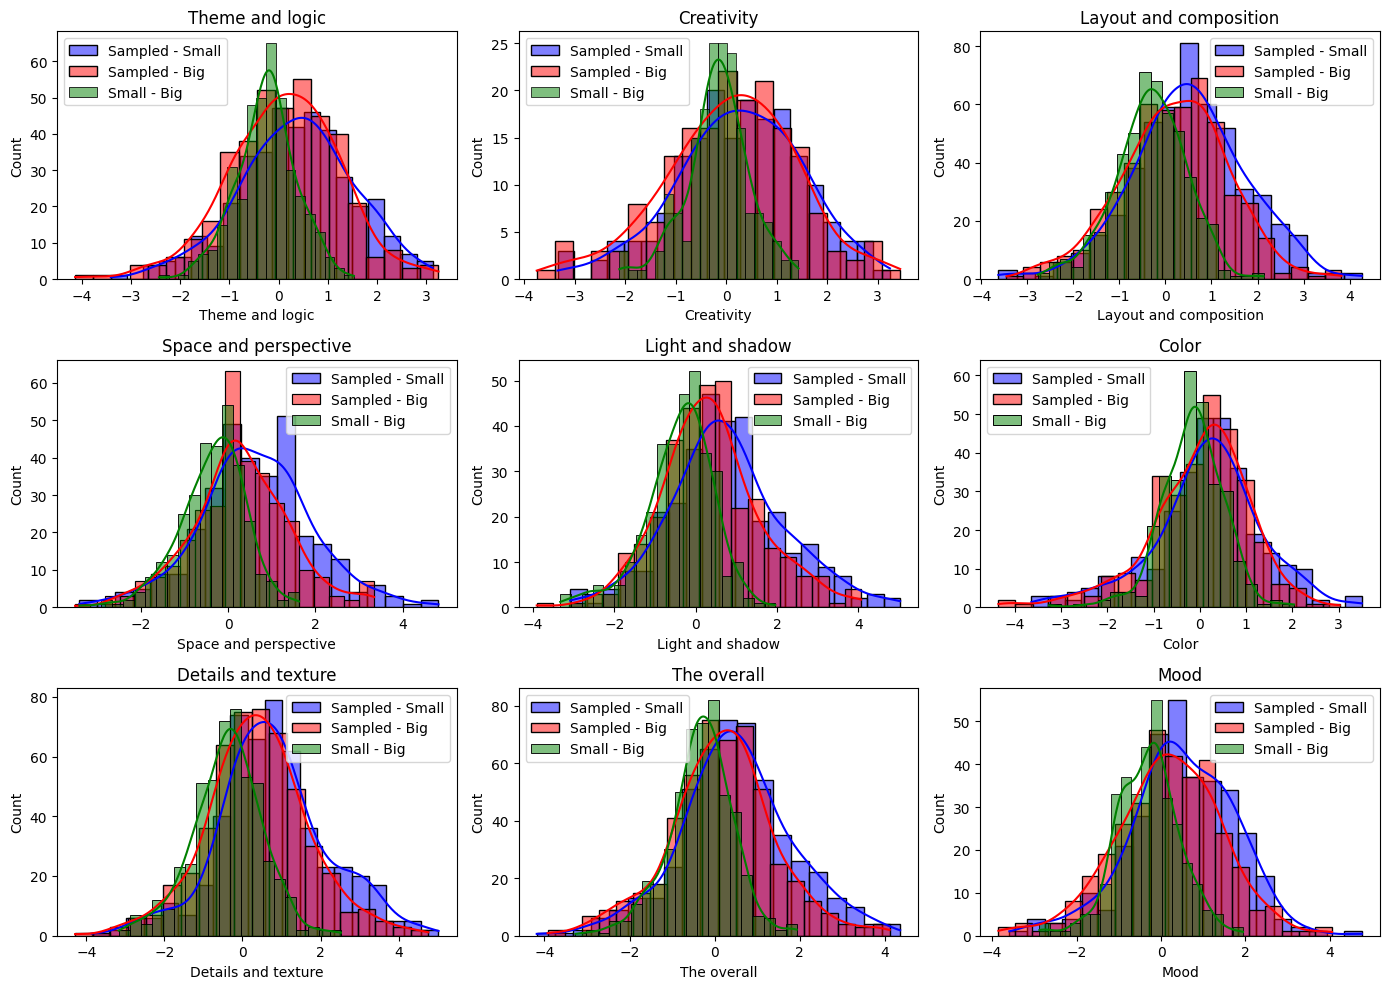

In [19]:
# Plotando histogramas para as diferenças entre cada categoria
plt.figure(figsize=(14, 10))
for i, categoria in enumerate(cols_to_compare, 1):
    plt.subplot(3, 3, i)  # 3x3 grid para 9 categorias
    sns.histplot(df_subtracao_os[categoria], kde=True, color='blue', label='Sampled - Small', bins=20)
    sns.histplot(df_subtracao_ob[categoria], kde=True, color='red', label='Sampled - Big', bins=20)
    sns.histplot(df_subtracao_sb[categoria], kde=True, color='green', label='Small - Big', bins=20)
    plt.title(categoria)
    plt.legend()

plt.tight_layout()
plt.show()


Essa tabela que você gerou contém as diferenças médias, desvios padrão e variância entre as pontuações de cada critério (como "Creativity", "Layout and composition", etc.) entre as imagens originais e as imagens geradas nos dois modelos (pequeno e grande). O que você está fazendo aqui é comparar a percepção humana (pontuação original) com a avaliação dos modelos, para entender onde os modelos pequenos e grandes diferem em relação à avaliação dos humanos.

### Como interpretar as colunas
- **mean**: A média das diferenças entre as pontuações dos critérios. Se o valor for positivo, significa que, em média, as imagens geradas (seja no modelo pequeno ou grande) foram avaliadas com uma pontuação superior à imagem original nesse critério. Se for negativo, significa que a avaliação da imagem gerada foi inferior.
- **std (desvio padrão)**: Indica a dispersão das diferenças. Quanto maior o valor, mais variada é a diferença entre as pontuações.
- **var (variância)**: A variância é simplesmente o quadrado do desvio padrão, oferecendo uma medida de dispersão dos dados.

### Como destacar mudanças significativas
Você pode usar a **média** das diferenças para identificar quais critérios apresentam as maiores mudanças, e com base no desvio padrão e variância, pode destacar se essas mudanças são consistentes ou não.

#### Passos para uma interpretação mais prática:
1. **Verifique as médias das diferenças**:
   - **Original-Small**: Se a média for positiva, significa que as imagens geradas pelo modelo pequeno foram, em média, avaliadas de forma melhor que as imagens originais.
   - **Original-Big**: O mesmo vale para o modelo maior comparado com o original.
   - **Small-Big**: Se a média for negativa, significa que o modelo pequeno foi avaliado melhor que o modelo grande.

2. **Enfatizar as diferenças significativas**:
   - Se um critério tem uma **média** muito alta ou muito baixa, isso sugere uma diferença significativa entre os modelos e o original.
   - O **desvio padrão** pode indicar a consistência dessa diferença. Se o desvio padrão for baixo, a diferença observada é mais consistente entre as imagens, enquanto um desvio padrão alto indica que a diferença pode variar muito.

### Como destacar relações específicas (exemplo: criatividade vs cor)
Para mostrar que **"nas imagens sintéticas foram mais bem avaliadas em criatividade e pior avaliadas em cor"**, você pode:

1. **Identificar as médias** de cada critério:
   - Para **Creativity**, olhe a média da coluna "Original-Small" e "Original-Big". Se a média for positiva e mais alta que a de outros critérios, você pode afirmar que as imagens geradas (seja pelo modelo pequeno ou grande) foram melhor avaliadas em criatividade.
   - Para **Color**, se a média da diferença em **Original-Small** ou **Original-Big** for negativa, você pode concluir que o modelo gerou imagens com uma avaliação mais baixa em cor.

2. **Comparações diretas**:
   - A partir das médias, você pode expressar algo como: *"As imagens geradas pelo modelo pequeno foram avaliadas significativamente mais altas em criatividade (média de 0.27) em comparação com as imagens originais, enquanto as imagens sintéticas foram pior avaliadas em cor (média de -0.01 no modelo grande e -0.32 no modelo pequeno)."*
   
3. **Realce de significância**:
   - Se a diferença entre as médias for **grande** (por exemplo, > 0.5 ou < -0.5), você pode dar maior ênfase a essa mudança, ressaltando a consistência ou a ausência dela, com base no desvio padrão.
   
### Exemplo de como expressar esses achados:
- **Criatividade**: As imagens geradas pelos modelos foram consistentemente avaliadas melhor em criatividade, com uma diferença média de 0.27 e 0.19 nas comparações "Original-Small" e "Original-Big", respectivamente. Isso sugere que tanto o modelo pequeno quanto o grande melhoraram a avaliação de criatividade em relação às imagens originais.
  
- **Cor**: No entanto, a avaliação de cor foi pior nas imagens geradas, com a média da diferença em "Original-Small" de 0.32 e em "Original-Big" de 0.31, indicando que as imagens sintetizadas apresentaram deficiências nesse critério.

Esse tipo de análise permite destacar as áreas onde os modelos se saem melhor e onde ainda há margens para melhorias, dando um panorama claro de como as avaliações dos modelos se comparam com as avaliações humanas.

In [43]:
# Recarregando bibliotecas após reset
import pandas as pd
from scipy.stats import shapiro, ttest_rel, wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols_to_compare = [
    "Theme and logic", "Creativity", "Layout and composition",
    "Space and perspective", "Light and shadow", "Color",
    "Details and texture", "The overall", "Mood"
]

# Função para calcular r de Wilcoxon corretamente
def calcular_r_wilcoxon(stat, n):
    # Média esperada da estatística W
    mean_w = n * (n + 1) / 4
    # Desvio padrão da estatística W
    std_w = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    # Z padronizado
    z = (stat - mean_w) / std_w
    # r de efeito
    r = z / np.sqrt(n)
    return abs(r)

def analisar_diferencas_completo(df_real, df_gerado, nome_analise, cols):
    resultados = []

    for col in cols:
        real = df_real[col]
        gerado = df_gerado[col]
        diff = real - gerado

        # Verificar normalidade da diferença
        stat_normalidade, p_normalidade = shapiro(diff)
        normal = p_normalidade >= 0.05

        # Escolher o teste adequado
        if normal:
            stat, p_valor = ttest_rel(real, gerado)
            teste = "t-test pareado"
            d = (real.mean() - gerado.mean()) / ((real.std() + gerado.std()) / 2)
            efeito = abs(d)
            efeito_nome = "Cohen's d"
        else:
            stat, p_valor = wilcoxon(real, gerado)
            teste = "Wilcoxon"
            n = len(real)
            r = calcular_r_wilcoxon(stat,n)
            efeito = r
            efeito_nome = "r de Wilcoxon"

        resultado = {
            "Categoria": col,
            "Média Real": round(real.mean(),4),
            "Média Modelo": round(gerado.mean(),4),
            "Desvio Real": round(real.std(),4),
            "Desvio Modelo": round(gerado.std(),4),
            "Variância Real": round(real.var(),4),
            "Variância Modelo": round(gerado.var(),4),
            "Teste": teste,
            "p-valor": round(p_valor, 4),
            "Significativo?": "Sim" if p_valor < 0.05 else "Não",
            "Normalidade": "Sim" if normal else "Não",
            "Tamanho do Efeito": round(efeito, 4),
            "Tipo do Efeito": efeito_nome,
            "Comparação": nome_analise
        }

        resultados.append(resultado)

    return pd.DataFrame(resultados)

# Executar as análises
res_os = analisar_diferencas_completo(sampled_df, df_small, "Original vs Small", cols_to_compare)
res_ob = analisar_diferencas_completo(sampled_df, df_big, "Original vs Big", cols_to_compare)
res_sb = analisar_diferencas_completo(df_small, df_big, "Small vs Big", cols_to_compare)

# Combinar resultados
tabela_resultados_completa = pd.concat([res_os, res_ob, res_sb], ignore_index=True)

# Salvar como imagem
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")
table_fig = plt.table(cellText=tabela_resultados_completa.values,
                      colLabels=tabela_resultados_completa.columns,
                      loc='center', cellLoc='center')
table_fig.scale(1, 2)
plt.axis('off')
saida_img = "/content/tabela_comparacoes_estatisticas.png"
plt.savefig(saida_img, bbox_inches='tight', dpi=300)
plt.close()

tabela_resultados_completa, saida_img

(                 Categoria  Média Real  Média Modelo  Desvio Real  \
 0          Theme and logic      6.2547        5.8862       1.2265   
 1               Creativity      5.9141        5.6547       1.4076   
 2   Layout and composition      6.2113        5.6923       1.3527   
 3    Space and perspective      6.3672        5.7360       1.3819   
 4         Light and shadow      6.2897        5.5299       1.4500   
 5                    Color      6.1947        6.0365       1.3803   
 6      Details and texture      6.1004        5.3295       1.5219   
 7              The overall      6.2644        5.7569       1.4059   
 8                     Mood      6.0266        5.5262       1.3510   
 9          Theme and logic      6.2547        6.1375       1.2265   
 10              Creativity      5.9141        5.8225       1.4076   
 11  Layout and composition      6.2113        6.0143       1.3527   
 12   Space and perspective      6.3672        6.0911       1.3819   
 13        Light and

📝 Observações <br>
O Cohen’s d é calculado apenas para distribuições normais.<br><br>

Ótima pergunta — e ela toca num ponto **fundamental** sobre **comparações estatísticas**!

---

### ✅ Por que **t-test pareado** ou **Wilcoxon** e **não Mann-Whitney**?

**Você tem dados pareados** — ou seja, para cada imagem original avaliada por humanos, existe uma **imagem correspondente gerada por IA**, avaliada nos mesmos critérios. Isso significa que:

* Cada par de observações está ligado: `nota_humana[i]` corresponde diretamente a `nota_modelo[i]`.

Esse tipo de situação exige **testes pareados**, que analisam **a diferença dentro dos pares**:

| Teste                    | Quando usar                                                 |
| ------------------------ | ----------------------------------------------------------- |
| **t-test pareado**       | Se a **diferença entre os pares** é normalmente distribuída |
| **Wilcoxon signed-rank** | Se **não** for normalmente distribuída                      |
| **Mann-Whitney U**       | Quando os grupos **não são pareados** (independentes)       |

---

### ❌ Quando o **Mann-Whitney** é incorreto aqui?

O **Mann-Whitney U** (ou Wilcoxon rank-sum) assume **grupos independentes**, por exemplo:

* Avaliações de **duas turmas diferentes** de alunos em provas distintas;
* Pessoas que receberam **dois tratamentos diferentes** sem pareamento direto.

Se você usar Mann-Whitney em dados **pareados**, você está **ignorando a estrutura do experimento**, o que pode:

* **Reduzir o poder estatístico** do teste,
* Levar a **conclusões erradas**.

---

### 🧠 Resumo prático

* ✅ **Use t-test pareado ou Wilcoxon signed-rank** se cada imagem humana tem um par correspondente na IA.
* ❌ **Não use Mann-Whitney** a menos que os grupos sejam **independentes**.

Se por algum motivo você tiver **amostras não pareadas**, posso te ajudar a ajustar o código para isso. Mas no seu caso, pareamento faz todo sentido!


In [23]:
# Lista de colunas a serem comparadas
cols_to_compare = [
    "Theme and logic", "Creativity", "Layout and composition",
    "Space and perspective", "Light and shadow", "Color",
    "Details and texture", "The overall", "Mood"
]

# Função para calcular a média, desvio padrão e variância
def calculate_statistics(df, cols):
    # Calculando as estatísticas
    stats = df[cols].agg(['mean', 'std', 'var']).T  # T faz a transposição para melhor exibição
    return stats

# Calcular as estatísticas para cada DataFrame
stats_df1 = calculate_statistics(df_subtracao_os, cols_to_compare)
stats_df2 = calculate_statistics(df_subtracao_ob, cols_to_compare)
stats_df3 = calculate_statistics(df_subtracao_sb, cols_to_compare)

# Juntar as estatísticas das três tabelas para comparação
comparison_df = pd.concat([stats_df1, stats_df2, stats_df3], axis=1, keys=['Original-Small', 'Original-Big', 'Small-Big'])

# Exibir o DataFrame de comparação
comparison_df

# Caso queira exibir ou exportar para um arquivo
#comparison_df.to_csv("comparacao_estatisticas.csv")  # Para salvar em arquivo CSV


Original-Small                     Original-Big  \
                                 mean       std       var         mean   
Theme and logic              0.368431  1.156092  1.336548     0.117193   
Creativity                   0.259476  1.242229  1.543133     0.091673   
Layout and composition       0.518928  1.232101  1.518072     0.196931   
Space and perspective        0.631171  1.289977  1.664041     0.276155   
Light and shadow             0.759826  1.419267  2.014319     0.354705   
Color                        0.158171  1.179038  1.390131    -0.001376   
Details and texture          0.770819  1.423339  2.025895     0.382961   
The overall                  0.507532  1.342378  1.801978     0.174909   
Mood                         0.500390  1.248702  1.559257     0.179303   

                                           Small-Big                      
                             std       var      mean       std       var  
Theme and logic         1.134462  1.287005 -0.251238  0.608058  0.369735  
Creativity              1.309221  1.714061 -0.167803  0.626605  0.392634  
Layout and composition  1.160384  1.346492 -0.321997  0.778109  0.605453  
Space and perspective   1.124598  1.264721 -0.355016  0.760460  0.578299  
Light and shadow        1.234505  1.524004 -0.405121  0.837837  0.701971  
Color                   1.094270  1.197426 -0.159547  0.671192  0.450498  
Details and texture     1.321113  1.745340 -0.387858  0.896366  0.803472  
The overall             1.248945  1.559863 -0.332623  0.764695  0.584758  
Mood                    1.253161  1.570412 -0.321087  0.746265  0.556912

In [ ]:
# Lista de colunas a serem comparadas
cols_to_compare = [
    "Theme and logic", "Creativity", "Layout and composition",
    "Space and perspective", "Light and shadow", "Color",
    "Details and texture", "The overall", "Mood"
]

# Função para calcular a média, desvio padrão e variância
def calculate_statistics(df, cols):
    # Calculando as estatísticas
    stats = df[cols].agg(['mean', 'std', 'var']).T  # T faz a transposição para melhor exibição
    return stats

# Calcular as estatísticas para cada DataFrame
stats_df1 = calculate_statistics(df_subtracao_os, cols_to_compare)
stats_df2 = calculate_statistics(df_subtracao_ob, cols_to_compare)

# Juntar as estatísticas das três tabelas para comparação
comparison_df = pd.concat([stats_df1, stats_df2], axis=1, keys=['Original-Small', 'Original-Big'])

# Exibir o DataFrame de comparação
comparison_df

# Caso queira exibir ou exportar para um arquivo
#comparison_df.to_csv("comparacao_estatisticas.csv")  # Para salvar em arquivo CSV


In [ ]:
styled_df = comparison_df.style.apply(highlight_extremes, axis=1).set_caption("Summary Difference Instance by Instance")
styled_df

In [ ]:
# Extraindo as médias dos três modelos
labels = comparison_df.index
num_vars = len(labels)

# Acessando as médias para cada modelo
original_small = comparison_df[('Original-Small', 'mean')].tolist()
original_big = comparison_df[('Original-Big', 'mean')].tolist()
#small_big = comparison_df[('Small-Big', 'mean')].tolist()

# Fechar o gráfico de radar (fechar a linha)
original_small += original_small[:1]
original_big += original_big[:1]
#small_big += small_big[:1]

# Criando o gráfico
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fechar o gráfico

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, original_small, color='blue', linewidth=2, linestyle='solid', label='Original-Small')
ax.plot(angles, original_big, color='green', linewidth=2, linestyle='solid', label='Original-Big')
#ax.plot(angles, small_big, color='red', linewidth=2, linestyle='solid', label='Small-Big')

ax.fill(angles, original_small, color='blue', alpha=0.25)
ax.fill(angles, original_big, color='green', alpha=0.25)
#ax.fill(angles, small_big, color='red', alpha=0.25)

# Adicionando as etiquetas
#ax.set_yticklabels([])  # Removendo as etiquetas do eixo radial
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)

# Títulos e legendas
ax.set_title('Comparison of Means between Models', size=14, color='black', y=1.1)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.show()

## Como interpretar o gráfico:<br>
**Eixos:** Cada eixo do gráfico representa um critério de avaliação (por exemplo, "Creativity", "Color", etc.).<br>
**Curvas: ** Cada uma das três curvas (blue, green, red) representa as médias dos critérios para cada uma das comparações:<br>
*   A linha azul representa a diferença entre a pontuação original e o modelo pequeno ("Original-Small").<br>
*   A linha verde representa a diferença entre a pontuação original e o modelo grande ("Original-Big").<br>
*   A linha vermelha representa a diferença entre o modelo pequeno e o modelo grande ("Small-Big").<br>
**Áreas preenchidas: ** As áreas preenchidas com cor destacam visualmente a diferença nas médias. Quanto mais distante do centro, maior a diferença.


## Como interpretar os resultados do gráfico:<br>
Se a linha azul (Original-Small) estiver mais distante do centro para um critério, isso indica que o modelo pequeno teve uma avaliação superior em relação ao original nesse critério.<br>
Se a linha verde (Original-Big) estiver mais distante do centro, significa que o modelo grande teve uma avaliação melhor nesse critério.<br>
A comparação entre as duas linhas azuis e verdes (Original-Small e Original-Big) permitirá ver qual modelo foi avaliado melhor em cada critério.<br>

In [ ]:
df_subtracao_sb.head()

[texto do link](https://)#Análise Shap / Prompt

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
import shap
import matplotlib.pyplot as plt

In [ ]:
# Definir as colunas de score
score_columns = [
    "Total aesthetic score", "Theme and logic", "Creativity", "Layout and composition", "Space and perspective",
     "Light and shadow", "Color", "Details and texture", "The overall", "Mood"
]

# Preencher valores NaN com string vazia
df_small["Description"] = df_small["Description"].fillna("")
df_big["Description"] = df_big["Description"].fillna("")

O output representa as palavras mais influentes para cada critério de avaliação ("Total aesthetic score", "Theme and logic", etc.), com base no modelo de regressão e análise SHAP. Aqui está como interpretar:

1. **Palavras-chave e sua influência**:  
   - Para cada critério, as palavras mais influentes aparecem junto com um valor numérico. Esse valor indica o impacto médio da palavra na previsão da pontuação.  
   - Exemplo: No critério **"Total aesthetic score"**, a palavra **"drawing"** tem um impacto de **1.4665**, o que sugere que quando essa palavra aparece na descrição, há uma forte influência na pontuação estética.

2. **Comparação entre critérios**:  
   - Algumas palavras aparecem em vários critérios (exemplo: "drawing", "sketch", "blue", "black"), sugerindo que elas impactam diferentes aspectos da avaliação.  
   - Algumas palavras são mais específicas para certos critérios. Exemplo: **"texture"** aparece mais em **"Space and perspective"** e **"Light and shadow"**, sugerindo que a presença dessa palavra pode estar ligada à percepção de profundidade e iluminação.

3. **Força da influência**:  
   - Quanto maior o valor associado a uma palavra, mais ela influencia a pontuação.  
   - Exemplo: **"drawing"** tem um impacto muito alto em "Total aesthetic score" (**1.4665**), mas um impacto menor em "Theme and logic" (**0.0800**). Isso indica que "drawing" é mais relevante para a estética geral do que para a coerência temática.

4. **Contextualização**:  
   - Se você está analisando descrições de obras de arte, pode inferir que palavras como **"sketch"**, **"pencil"**, **"painting"** são fatores positivos que elevam as notas.  
   - Se estiver treinando um modelo para avaliar trabalhos artísticos, pode usar essas palavras para entender o que os avaliadores valorizam.

Resumindo: o output mostra quais palavras são mais importantes para cada critério e com que intensidade elas afetam as pontuações. Se seu objetivo for melhorar descrições ou entender como as avaliações são feitas, pode focar nas palavras que mais impactam cada critério.

Pequeno

In [ ]:
# Vetorização do texto usando TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X_text = vectorizer.fit_transform(df_small["Description"])

# Dicionário para armazenar explicações SHAP
shap_explanations = {}

for score in score_columns:
    y = df_small[score].fillna(df_small[score].mean())  # Preencher valores NaN com a média

    # Treinar um modelo de regressão
    model = Ridge(alpha=1.0)
    model.fit(X_text, y)

    # Analisar com SHAP
    explainer = shap.Explainer(model, X_text)
    shap_values = explainer(X_text)

    # Guardar os valores SHAP
    shap_explanations[score] = shap_values

# Exibir as palavras mais influentes para cada score
feature_names = vectorizer.get_feature_names_out()
for score, shap_values in shap_explanations.items():
    importance = np.abs(shap_values.values).mean(axis=0)
    top_words = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)[:10]
    print(f"Palavras mais influentes para {score}: {top_words}\n")


Grande

In [ ]:
# Vetorização do texto usando TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X_text = vectorizer.fit_transform(df_big["Description"])

# Dicionário para armazenar explicações SHAP
shap_explanations = {}

for score in score_columns:
    y = df_big[score].fillna(df_big[score].mean())  # Preencher valores NaN com a média

    # Treinar um modelo de regressão
    model = Ridge(alpha=1.0)
    model.fit(X_text, y)

    # Analisar com SHAP
    explainer = shap.Explainer(model, X_text)
    shap_values = explainer(X_text)

    # Guardar os valores SHAP
    shap_explanations[score] = shap_values

# Exibir as palavras mais influentes para cada score
feature_names = vectorizer.get_feature_names_out()
for score, shap_values in shap_explanations.items():
    importance = np.abs(shap_values.values).mean(axis=0)
    top_words = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)[:10]
    print(f"Palavras mais influentes para {score}: {top_words}\n")


Tirando palavras que apareçam em pelo menos 50% do texto

In [ ]:
from collections import Counter
# Contar a frequência das palavras no corpus
token_counts = Counter()
for desc in df_small["Description"]:
    token_counts.update(desc.lower().split())

# Definir um limite de frequência alta (exemplo: palavras que aparecem em mais de 50% dos textos)
#TODO mexer nesse parametro
num_docs = len(df_small)
high_freq_words = {word for word, count in token_counts.items() if count / num_docs > 0.5}
print("Palavras muito frequentes removidas:", high_freq_words)

# Criar o vetorizador TF-IDF sem essas palavras
vectorizer = TfidfVectorizer(stop_words="english", max_features=500, vocabulary=[w for w in token_counts if w not in high_freq_words])
X_text = vectorizer.fit_transform(df_small["Description"])

# Exibir as palavras restantes
print("Palavras finais no TF-IDF:", vectorizer.get_feature_names_out())

In [ ]:
# Dicionário para armazenar explicações SHAP
shap_explanations = {}

for score in score_columns:
    y = df_big[score].fillna(df_big[score].mean())  # Preencher valores NaN com a média

    # Treinar um modelo de regressão
    model = Ridge(alpha=1.0)
    model.fit(X_text, y)

    # Analisar com SHAP
    explainer = shap.Explainer(model, X_text)
    shap_values = explainer(X_text)

    # Guardar os valores SHAP
    shap_explanations[score] = shap_values

# Exibir as palavras mais influentes para cada score
feature_names = vectorizer.get_feature_names_out()
for score, shap_values in shap_explanations.items():
    importance = np.abs(shap_values.values).mean(axis=0)
    top_words = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)[:10]
    print(f"Palavras mais influentes para {score}: {top_words}\n")

In [ ]:
for score, shap_values in shap_explanations.items():
    importance = np.abs(shap_values.values).mean(axis=0)
    top_words = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)[:10]

    words, values = zip(*top_words)

    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], values[::-1], color="skyblue")  # Inverte para ficar do maior para o menor
    plt.xlabel("Importância Média SHAP")
    plt.ylabel("Palavra")
    plt.title(f"Palavras mais influentes para {score}")
    plt.show()

Esse gráfico **SHAP (Shapley Additive Explanations)** é uma ferramenta útil para interpretar modelos de machine learning, especialmente no contexto de modelos que envolvem textos ou dados de alta dimensionalidade.

### Como interpretar o gráfico SHAP:

- **Eixo X**: Indica o impacto das features no modelo. Se a importância de uma feature é positiva, ela contribui para a previsão ser mais alta; se for negativa, ela contribui para a previsão ser mais baixa.
- **Eixo Y**: Cada linha representa uma feature (neste caso, uma palavra do texto). A posição ao longo do eixo Y indica a importância relativa de cada palavra.
- **Cor**: A cor (geralmente do azul ao vermelho) mostra o valor da feature para cada instância de entrada. Valores mais baixos (geralmente azul) indicam que a feature tem um valor menor para aquela instância, e valores mais altos (geralmente vermelhos) indicam que a feature tem um valor maior.
- **Pontos**: Cada ponto no gráfico representa a contribuição da feature para uma instância individual. Isso ajuda a visualizar a variabilidade de como uma feature afeta as previsões.

Se quiser outro tipo de visualização, pode-se considerar um gráfico de **dependência** ou **force plot**, que permite explorar a contribuição de features específicas para previsões individuais.

Se você precisar de mais alguma explicação ou exemplo de visualização, é só avisar!

In [ ]:
for score, shap_values in shap_explanations.items():
    print(score)
    shap.summary_plot(shap_values, X_text, feature_names=feature_names)

In [ ]:
# Escolher um exemplo específico (linha da base de dados)
index = 0  # Altere conforme necessário
shap.force_plot(
    shap_explanations["Total aesthetic score"].base_values,
    shap_explanations["Total aesthetic score"].values[index, :],
    feature_names=vectorizer.get_feature_names_out(),
    matplotlib=True
)
plt.show()

In [ ]:
# Escolher um exemplo específico (linha da base de dados)
index = 0  # Altere conforme necessário
shap.force_plot(
    shap_explanations["Creativity"].base_values,
    shap_explanations["Creativity"].values[index, :],
    feature_names=vectorizer.get_feature_names_out(),
    matplotlib=True
)
plt.show()

In [ ]:
# Escolher um exemplo específico (linha da base de dados)
index = 0  # Altere conforme necessário
shap.force_plot(
    shap_explanations["Color"].base_values,
    shap_explanations["Color"].values[index, :],
    feature_names=vectorizer.get_feature_names_out(),
    matplotlib=True
)
plt.show()

1. Gráfico de Dependência (Dependency Plot)
Esse gráfico permite analisar como o valor de uma feature (palavra) se relaciona com a previsão do modelo. Assim, se você quiser destacar palavras como "texture", você pode gerar gráficos de dependência para elas. Isso ajuda a entender como uma palavra específica, como "texture", afeta a previsão, dependendo do seu valor.

Exemplo de código para gerar gráficos de dependência para palavras específicas:

python
Copiar
Editar
import shap

Suponha que "shap_explanations" tenha os valores SHAP e "X_text" seja o conjunto de dados de entrada
shap.dependence_plot("texture", shap_values, X_text, feature_names=feature_names)
Isso criaria um gráfico para "texture", onde você pode observar como a presença da palavra afeta a pontuação do critério, mostrando a relação entre o valor da palavra e o impacto no modelo.

#Usando Tuplas/trincas

In [ ]:
# Lista de critérios estéticos
score_columns = [
    "Total aesthetic score", "Theme and logic", "Creativity",
    "Layout and composition", "Space and perspective",
    "Light and shadow", "Color", "Details and texture",
    "The overall", "Mood"
]

# Criação do TfidfVectorizer com n-grams: (1,3) significa unigramas, bigramas e trigramas
vectorizer_ngram = TfidfVectorizer(stop_words="english", ngram_range=(1, 3), max_features=500)
X_text_ngram = vectorizer_ngram.fit_transform(df_big["Description"])
feature_names_ngram = vectorizer_ngram.get_feature_names_out()

print("Expressões (n‑grams) utilizadas:")
print(feature_names_ngram)

# Dicionário para armazenar as explicações SHAP por critério (usando n‑grams)
shap_explanations_ngram = {}

for score in score_columns:
    y = df_big[score].fillna(df_big[score].mean())
    model = Ridge(alpha=1.0)
    model.fit(X_text_ngram, y)
    explainer = shap.Explainer(model, X_text_ngram)
    shap_values = explainer(X_text_ngram)
    shap_explanations_ngram[score] = shap_values

# Exibir as 10 expressões (n‑grams) mais influentes para cada critério
for score, shap_values in shap_explanations_ngram.items():
    importance = np.abs(shap_values.values).mean(axis=0)
    top_features = sorted(zip(feature_names_ngram, importance), key=lambda x: x[1], reverse=True)[:10]
    print(f"\nTop expressões para '{score}':")
    for feature, imp in top_features:
        print(f"{feature}: {imp:.4f}")


In [ ]:
import shap
import numpy as np
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge

# Baixar dados do nltk (caso ainda não tenha baixado)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Exemplo de dataset com descrições e scores
descriptions = df_big['Description']
#scores = df_big['Total aesthetic score']
scores = df_big['Total Score']

# Tokenizar e identificar adjetivos
def extract_adjectives(text):
    words = word_tokenize(text)  # Quebrar em palavras
    tagged_words = pos_tag(words)  # Analisar classe gramatical
    adjectives = [word for word, tag in tagged_words if tag in ["JJ", "JJR", "JJS"]]
    return " ".join(adjectives)  # Retorna apenas os adjetivos como string

# Aplicar a função a todas as descrições
filtered_descriptions = descriptions.apply(extract_adjectives)

# Vetorização do texto com apenas os adjetivos
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X_text = vectorizer.fit_transform(filtered_descriptions)
feature_names = vectorizer.get_feature_names_out()

# Treinar modelo de regressão
model = Ridge(alpha=1.0)
model.fit(X_text, scores)

# Calcular valores SHAP
explainer = shap.Explainer(model, X_text)
shap_values = explainer(X_text)

# Calcular o impacto médio das palavras
importance = np.abs(shap_values.values).mean(axis=0)
top_words = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)[:10]

# Exibir os 10 adjetivos mais impactantes
print("\n\nAdjetivos que mais impactam os scores e seu efeito médio:")
for word, impact in top_words:
    print(f"{word}: {impact:.4f}")


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist

# Carregar modelo BERT para gerar embeddings das palavras
model = SentenceTransformer('all-MiniLM-L6-v2')

# Lista de adjetivos extraídos da análise
adjectives = feature_names

# Gerar embeddings para os adjetivos
word_embeddings = model.encode(adjectives)

# Aplicar K-Means para agrupar palavras semanticamente similares
num_clusters = 3  # Ajuste conforme necessário
clustering_model = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clustering_model.fit(word_embeddings)

# Obter os centróides dos clusters
cluster_centers = clustering_model.cluster_centers_

# Encontre a palavra mais próxima do centróide do cluster (palavra representativa)
cluster_labels = clustering_model.labels_
cluster_representatives = {}

for cluster_id in range(num_clusters):
    # Pegamos os embeddings das palavras que pertencem ao cluster atual
    words_in_cluster = [adjectives[i] for i in range(len(adjectives)) if cluster_labels[i] == cluster_id]
    embeddings_in_cluster = np.array([word_embeddings[i] for i in range(len(adjectives)) if cluster_labels[i] == cluster_id])

    # Calculamos a palavra mais próxima do centróide do cluster
    distances = cdist([cluster_centers[cluster_id]], embeddings_in_cluster, metric='cosine')[0]
    representative_idx = np.argmin(distances)
    cluster_representatives[cluster_id] = words_in_cluster[representative_idx]  # Palavra central do cluster

# Mapear palavras para seus clusters nomeados
word_to_cluster = {adjectives[i]: cluster_labels[i] for i in range(len(adjectives))}

# Exibir agrupamento com nomes representativos
print("\nAgrupamento de palavras com centróides:")
for word, cluster_id in word_to_cluster.items():
    print(f"{word}: Grupo {cluster_id} ({cluster_representatives[cluster_id]})")


In [ ]:
import numpy as np
import shap
import nltk
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from nltk.corpus import wordnet
from nltk import pos_tag

# Certifique-se de ter os pacotes do nltk baixados
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Vetorização do texto usando TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X_text = vectorizer.fit_transform(df_big["Description"])

# Dicionário para armazenar explicações SHAP
shap_explanations = {}

for score in score_columns:
    y = df_big[score].fillna(df_big[score].mean())  # Preencher valores NaN com a média

    # Treinar um modelo de regressão
    model = Ridge(alpha=1.0)
    model.fit(X_text, y)

    # Analisar com SHAP
    explainer = shap.Explainer(model, X_text)
    shap_values = explainer(X_text)

    # Guardar os valores SHAP
    shap_explanations[score] = shap_values

# Obter os nomes das features
feature_names = vectorizer.get_feature_names_out()

# Função para verificar se uma palavra é um adjetivo
def is_adjective(word):
    pos = pos_tag([word])[0][1]  # Obter a tag gramatical
    return pos in ['JJ', 'JJR', 'JJS']  # Adjetivos (normal, comparativo e superlativo)

for score, shap_values in shap_explanations.items():
    importance = np.abs(shap_values.values).mean(axis=0)
    top_words = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)

    # Filtrar apenas adjetivos
    top_adjectives = [word for word, _ in top_words if is_adjective(word)][:10]

    # Criar duplas e trincas de adjetivos
    top_adjective_pairs = list(itertools.combinations(top_adjectives, 2))
    top_adjective_triples = list(itertools.combinations(top_adjectives, 3))

    # Imprimir resultados
    print(f"Palavras mais influentes para {score} (adjetivos): {top_adjectives}\n")

In [ ]:
for score, shap_values in shap_explanations.items():
  print(f"Duplas de adjetivos mais influentes para {score}: {top_adjective_pairs}\n")

In [ ]:
  for score, shap_values in shap_explanations.items():
    print(f"Trincas de adjetivos mais influentes para {score}: {top_adjective_triples}\n")

In [ ]:
import shap
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import Ridge

# Baixar dados do nltk (caso ainda não tenha baixado)
nltk.download('punkt')

# Vetorização do texto usando CountVectorizer para contar as palavras
vectorizer = CountVectorizer(stop_words="english", max_features=500)
X_text = vectorizer.fit_transform(df_big["Description"])

# Calcular a frequência de cada palavra
word_counts = X_text.sum(axis=0).A1  # Conta o número de vezes que cada palavra aparece
words = vectorizer.get_feature_names_out()

# Calcular o limiar para palavras raras (aparecem em menos de 20% da base)
threshold = 0.2 * X_text.shape[0]  # 20% do número total de amostras

# Filtrar as palavras que aparecem em menos de 20% dos documentos
rare_words = [word for word, count in zip(words, word_counts) if count < threshold]

# Dicionário para armazenar explicações SHAP
shap_explanations = {}

for score in score_columns:
    y = df_big[score].fillna(df_big[score].mean())  # Preencher valores NaN com a média

    # Treinar um modelo de regressão
    model = Ridge(alpha=1.0)
    model.fit(X_text, y)

    # Analisar com SHAP
    explainer = shap.Explainer(model, X_text)
    shap_values = explainer(X_text)

    # Guardar os valores SHAP
    shap_explanations[score] = shap_values

# Exibir as palavras mais influentes para cada score (palavras raras)
feature_names = vectorizer.get_feature_names_out()

for score, shap_values in shap_explanations.items():
    # Calcular a importância das palavras
    importance = np.abs(shap_values.values).mean(axis=0)
    top_words = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)[:10]

    # Filtrar para pegar apenas as palavras raras
    top_rare_words = [word for word, _ in top_words if word in rare_words]

    # Exibir resultados
    print(f"Palavras raras mais influentes para {score}: {top_rare_words}")
    print("\n")

#TESTE Chinese

In [ ]:
df_big.columns

In [ ]:
import numpy as np
import shap
import nltk
import itertools
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from nltk.corpus import wordnet
from nltk import pos_tag

# Certifique-se de ter os pacotes do nltk baixados
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Vetorização do texto usando TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X_text = vectorizer.fit_transform(df_big["Description"])

# Dicionário para armazenar explicações SHAP
shap_explanations = {}

for score in score_columns:
    y = df_big[score].fillna(df_big[score].mean())  # Preencher valores NaN com a média

    # Treinar um modelo de regressão
    model = Ridge(alpha=1.0)
    model.fit(X_text, y)

    # Analisar com SHAP
    explainer = shap.Explainer(model, X_text)
    shap_values = explainer(X_text)

    # Guardar os valores SHAP
    shap_explanations[score] = shap_values

# Obter os nomes das features
feature_names = vectorizer.get_feature_names_out()

# Função para verificar se uma palavra é um adjetivo
def is_adjective(word):
    pos = pos_tag([word])[0][1]  # Obter a tag gramatical
    return pos in ['JJ', 'JJR', 'JJS']  # Adjetivos (normal, comparativo e superlativo)

for score, shap_values in shap_explanations.items():
    importance = np.abs(shap_values.values).mean(axis=0)
    top_words = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)

    # Filtrar apenas adjetivos
    top_adjectives = [word for word, _ in top_words if is_adjective(word)][:10]

    # Criar duplas e trincas de adjetivos
    top_adjective_pairs = list(itertools.combinations(top_adjectives, 2))
    top_adjective_triples = list(itertools.combinations(top_adjectives, 3))

    # Imprimir resultados
    #print(f"Palavras mais influentes para {score} (adjetivos): {top_adjectives}\n")
    #print(f"Duplas de adjetivos mais influentes para {score}: {top_adjective_pairs}\n")
    #print(f"Trincas de adjetivos mais influentes para {score}: {top_adjective_triples}\n")

# Teste de "chinese" na descrição ou na categoria estética
mask = df_big["Description"].str.contains("chinese", case=False, na=False) | df_big["Artistic Categories"].str.contains("chinese", case=False, na=False)
avg_score_chinese = df_big.loc[mask, "Total aesthetic score"].mean()
avg_score_non_chinese = df_big.loc[~mask, "Total aesthetic score"].mean()

print(f"Média do Total Aesthetic Score para descrições com 'chinese' ou categoria 'chinese': {avg_score_chinese}")
print(f"Média do Total Aesthetic Score para descrições sem 'chinese' ou categoria 'chinese': {avg_score_non_chinese}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um dataframe com os resultados para plotagem
scores_data = {
    'Score': df_big["Total aesthetic score"],
    'Category': ['Chinese' if x else 'Non-Chinese' for x in mask]
}

scores_df = pd.DataFrame(scores_data)

# Plotar o boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Score', data=scores_df)
plt.title('Distribuição do Total Aesthetic Score com e sem "Chinese"')
plt.xlabel('Categoria')
plt.ylabel('Total Aesthetic Score')
plt.show()


#Por faixas de pontuação

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_word_clusters(word_to_cluster, cluster_representatives, word_importance, top_n=10):
    """
    Plota um grafo conectando as palavras mais importantes aos seus clusters semânticos.

    Parâmetros:
        word_to_cluster (dict): Dicionário mapeando palavras para seus clusters.
        cluster_representatives (dict): Dicionário mapeando clusters para seus centróides.
        word_importance (dict): Dicionário de palavras e sua importância (exemplo: SHAP values).
        top_n (int): Número de palavras mais importantes a serem exibidas.
    """
    # Selecionar as top N palavras mais importantes
    top_words = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_words = [word for word, _ in top_words]  # Apenas as palavras

    # Criar um dicionário para mapear cada palavra ao seu cluster
    word_to_cluster_top = {word: word_to_cluster[word] for word in top_words if word in word_to_cluster}

    # Criar o grafo
    G = nx.Graph()

    # Adicionar centróides (preto)
    for centroid in cluster_representatives.values():
        G.add_node(centroid, color="white", size=700)

    # Adicionar palavras do top N (vermelho) e conectar aos centróides
    for word, cluster_id in word_to_cluster_top.items():
        centroid = cluster_representatives[cluster_id]  # Obtemos o centróide do cluster
        G.add_node(word, color="red", size=500)  # Nó da palavra
        G.add_edge(centroid, word)  # Criar aresta entre a palavra e o cluster

    # Obter cores e tamanhos dos nós
    node_colors = [G.nodes[node]["color"] for node in G.nodes]
    node_sizes = [G.nodes[node]["size"] for node in G.nodes]

    # Desenhar o grafo
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)  # Layout do grafo
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color="gray", font_size=10, font_weight="bold")

    plt.title("Visualização dos Clusters e Palavras Mais Importantes")
    plt.show()

# Exemplo de chamada da função:
#plot_word_clusters(word_to_cluster, cluster_representatives, word_importance, top_n=5)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
import shap
from wordcloud import WordCloud

# Suponha que o DataFrame 'df' possua as colunas "Avg Score" e "Description"
# Filtrando as colunas desejadas e calculando a soma cumulativa

df_big['Total Score'] = df_big[cols_to_compare].sum(axis=1)
df_big['Avg Score'] = df_big['Total Score']/len(cols_to_compare)

# 1. Criar bins para as pontuações de 1 a 10
# Usamos bins de 1 até 11 para que os intervalos sejam [1,2), [2,3), ..., [10,11)
bins = list(range(1, 12))
labels = [str(i) for i in range(1, 11)]
df_big["score_bin"] = pd.cut(df_big["Avg Score"], bins=bins, labels=labels, include_lowest=True)

print("Distribuição dos bins:")
print(df_big["score_bin"].value_counts())

# 2. Calcular o TF-IDF a partir das descrições
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X_text = vectorizer.fit_transform(df_big["Description"])
feature_names = vectorizer.get_feature_names_out()

# 3. Para cada faixa de pontuação, treinar o modelo, calcular os valores SHAP e gerar a word cloud
for bin_label in labels:
    df_bin = df_big[df_big["score_bin"] == bin_label]
    if df_bin.empty:
        print(f"Bin {bin_label} está vazio. Pulando...")
        continue

    indices = df_bin.index
    X_bin = X_text[indices]
    # Se houver NaN, preenche com a média do grupo
    y_bin = df_bin["Avg Score"].fillna(df_bin["Avg Score"].mean())

    # Treinar o modelo Ridge para os textos deste bin
    model = Ridge(alpha=1.0)
    model.fit(X_bin, y_bin)

    # Calcular os valores SHAP para esta faixa
    explainer = shap.Explainer(model, X_bin)
    shap_values = explainer(X_bin)

    # Cálculo da importância média (valor absoluto) de cada palavra
    importance = np.abs(shap_values.values).mean(axis=0)

    # Criar um dicionário que mapeia cada feature (palavra) à sua importância
    word_importance = dict(zip(feature_names, importance))

    # Gerar a word cloud com base nas frequências (importâncias)
    wc = WordCloud(width=800, height=400, background_color='white')
    wc.generate_from_frequencies(word_importance)

    # Exibir a word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"Word Cloud para a faixa de score {bin_label}")
    plt.axis("off")
    plt.show()

    # Opcional: salvar a imagem
    wc.to_file(f"wordcloud_score_{bin_label}.png")



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

TOP_QNT = 10

# Download necessary NLTK packages
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# 1. Analyze the relationship between scores and artistic categories
df_big['Total Score'] = df_big[cols_to_compare].sum(axis=1)
df_big['Avg Score'] = df_big['Total Score'] / len(cols_to_compare)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_big, x="Avg Score", y="Artistic Categories")
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Scores by Artistic Category")
plt.show()

# 2. Create bins for stratification
bins = list(range(1, 12))
labels = [str(i) for i in range(1, 11)]
df_big["score_bin"] = pd.cut(df_big["Avg Score"], bins=bins, labels=labels, include_lowest=True)

# 3. Create word clouds for each bin using all words from descriptions
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X_text = vectorizer.fit_transform(df_big["Description"])
feature_names = vectorizer.get_feature_names_out()

for bin_label in labels:
    df_bin = df_big[df_big["score_bin"] == bin_label]
    if df_bin.empty:
        continue

    indices = df_bin.index
    X_bin = X_text[indices]
    y_bin = df_bin["Avg Score"].fillna(df_bin["Avg Score"].mean())

    model = Ridge(alpha=1.0)
    model.fit(X_bin, y_bin)

    explainer = shap.Explainer(model, X_bin)
    shap_values = explainer(X_bin)

    importance = np.abs(shap_values.values).mean(axis=0)
    word_importance = dict(zip(feature_names, importance))

    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_importance)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"Word Cloud - Score Bin {bin_label}")
    plt.axis("off")
    plt.show()

    plot_word_clusters(word_to_cluster, cluster_representatives, word_importance, top_n=TOP_QNT)


# 4. Semantically group using BERT
model = SentenceTransformer('all-MiniLM-L6-v2')
word_embeddings = model.encode(feature_names)
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clustering_model.fit(word_embeddings)

cluster_centers = clustering_model.cluster_centers_
word_to_cluster = {feature_names[i]: clustering_model.labels_[i] for i in range(len(feature_names))}

# Find cluster centroids
cluster_representatives = {}
for cluster_id in range(num_clusters):
    words_in_cluster = [feature_names[i] for i in range(len(feature_names)) if clustering_model.labels_[i] == cluster_id]
    embeddings_in_cluster = np.array([word_embeddings[i] for i in range(len(feature_names)) if clustering_model.labels_[i] == cluster_id])
    distances = cdist([cluster_centers[cluster_id]], embeddings_in_cluster, metric='cosine')[0]
    representative_idx = np.argmin(distances)
    cluster_representatives[cluster_id] = words_in_cluster[representative_idx]

# Display grouping with centroids
print("\nSemantic Groups and Their Centroids:")
for word, cluster_id in word_to_cluster.items():
    print(f"{word}: Group {cluster_id} ({cluster_representatives[cluster_id]})")

# 5. Create word clouds using only adjectives
def extract_adjectives(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    adjectives = [word for word, tag in tagged_words if tag in ["JJ", "JJR", "JJS"]]
    return " ".join(adjectives)

df_big["Adjective Description"] = df_big["Description"].apply(extract_adjectives)

vectorizer_adj = TfidfVectorizer(stop_words="english", max_features=500)
X_adj = vectorizer_adj.fit_transform(df_big["Adjective Description"])
feature_names_adj = vectorizer_adj.get_feature_names_out()

for bin_label in labels:
    df_bin = df_big[df_big["score_bin"] == bin_label]
    if df_bin.empty:
        continue

    indices = df_bin.index
    X_bin = X_adj[indices]
    y_bin = df_bin["Avg Score"].fillna(df_bin["Avg Score"].mean())

    model = Ridge(alpha=1.0)
    model.fit(X_bin, y_bin)

    explainer = shap.Explainer(model, X_bin)
    shap_values = explainer(X_bin)

    importance = np.abs(shap_values.values).mean(axis=0)
    word_importance = dict(zip(feature_names_adj, importance))

    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_importance)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"Adjective Word Cloud - Score Bin {bin_label}")
    plt.axis("off")
    plt.show()
    plot_word_clusters(word_to_cluster, cluster_representatives, word_importance, top_n=TOP_QNT)


# 6. Semantically group adjectives with BERT
model = SentenceTransformer('all-MiniLM-L6-v2')
word_embeddings_adj = model.encode(feature_names_adj)
clustering_model_adj = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clustering_model_adj.fit(word_embeddings_adj)

cluster_centers_adj = clustering_model_adj.cluster_centers_
word_to_cluster_adj = {feature_names_adj[i]: clustering_model_adj.labels_[i] for i in range(len(feature_names_adj))}

cluster_representatives_adj = {}
for cluster_id in range(num_clusters):
    words_in_cluster = [feature_names_adj[i] for i in range(len(feature_names_adj)) if clustering_model_adj.labels_[i] == cluster_id]
    embeddings_in_cluster = np.array([word_embeddings_adj[i] for i in range(len(feature_names_adj)) if clustering_model_adj.labels_[i] == cluster_id])
    distances = cdist([cluster_centers_adj[cluster_id]], embeddings_in_cluster, metric='cosine')[0]
    representative_idx = np.argmin(distances)
    cluster_representatives_adj[cluster_id] = words_in_cluster[representative_idx]

print("\nSemantic Groups of Adjectives and Their Centroids:")
for word, cluster_id in word_to_cluster_adj.items():
    print(f"{word}: Group {cluster_id} ({cluster_representatives_adj[cluster_id]})")


#TODO ORGANIZAR

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import os
from PIL import Image

def load_images(df, base_path, filename_column='generated_filename', size=(128, 128)):
    """Carrega imagens com base nos caminhos fornecidos no dataframe e as redimensiona para um tamanho fixo."""
    images = []
    for filename in tqdm(df[filename_column], desc="Carregando Imagens"):
        filepath = os.path.join(base_path, filename.split('/')[-1])
        try:
            img = Image.open(filepath).convert('L')  # Convertendo para escala de cinza
            img = img.resize(size)  # Redimensiona para o tamanho fixo
            images.append(np.array(img).flatten())  # Transforma em vetor
        except Exception as e:
            print(f"Erro ao carregar {filepath}: {e}")
    return np.array(images)

def novelty_all(generated_images, real_images):
    """Calcula a novidade de cada imagem gerada com relação ao conjunto real."""
    novelties = []
    for img in tqdm(generated_images, desc="Calculando Novelty"):
        distances = np.linalg.norm(real_images - img, axis=1)
        novelties.append(np.min(distances))
    return np.array(novelties)

def diversity_all(generated_images):
    """Calcula a diversidade média entre todas as imagens geradas."""
    pairwise_distances = pdist(generated_images, metric='euclidean')
    return np.mean(pairwise_distances)

def originality_score(generated_image, dataset):
    """Calcula a originalidade de uma imagem em relação ao dataset de referência."""
    similarities = cosine_similarity(generated_image.reshape(1, -1), dataset)
    return 1 - np.max(similarities)

# Definição dos caminhos
real_images_path = "/content/APDDv2/APDDv2images"
#generated_small_path = "/content/generated_images/generated_oficial_small"
#generated_big_path = "/content/generated_images/generated_oficial_big"
generated_small_path = "/content/generated_oficial_small"
generated_big_path = "/content/generated_oficial_big"

# Carregamento dos dados
generated_images_small = load_images(df_small, generated_small_path)
generated_images_big = load_images(df_big, generated_big_path)
real_images = load_images(df_big,real_images_path,filename_column="filename")  # Supondo que df_big tenha referência ao dataset original

# Cálculo das métricas
novelty_scores_small = novelty_all(generated_images_small, real_images)
diversity_score_small = diversity_all(generated_images_small)

novelty_scores_big = novelty_all(generated_images_big, real_images)
diversity_score_big = diversity_all(generated_images_big)

# Visualizando resultados
plt.figure(figsize=(10, 5))
plt.hist(novelty_scores_small, bins=50, alpha=0.7, color='blue', edgecolor='black', label='Small')
plt.hist(novelty_scores_big, bins=50, alpha=0.7, color='red', edgecolor='black', label='Big')
plt.xlabel('Novelty Score')
plt.ylabel('Frequência')
plt.title('Distribuição de Novelty das Imagens Geradas')
plt.legend()
plt.show()

print(f"Diversity Score Small: {diversity_score_small:.4f}")
print(f"Diversity Score Big: {diversity_score_big:.4f}")
print(f"Novelty Médio Small: {np.mean(novelty_scores_small):.4f}")
print(f"Novelty Médio Big: {np.mean(novelty_scores_big):.4f}")


In [ ]:
import seaborn as sns

def plot_confusion_matrix(images1, images2, title="Matriz de Similaridade"):
    """Calcula e plota a matriz de similaridade entre dois conjuntos de imagens."""
    similarity_matrix = cosine_similarity(images1, images2)

    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, cmap="coolwarm", annot=False)
    plt.xlabel("Conjunto 2")
    plt.ylabel("Conjunto 1")
    plt.title(title)
    plt.show()

# Comparando todos com todos
plot_confusion_matrix(generated_images_small, generated_images_big, title="Matriz de Similaridade: Small vs Big")
plot_confusion_matrix(generated_images_small, real_images, title="Matriz de Similaridade: Small vs Real")
plot_confusion_matrix(generated_images_big, real_images, title="Matriz de Similaridade: Big vs Real")


In [ ]:
def summarize_similarity(images1, images2, name1, name2):
    """Calcula estatísticas resumidas da similaridade entre dois conjuntos de imagens."""
    similarity_matrix = cosine_similarity(images1, images2)

    mean_sim = np.mean(similarity_matrix)  # Média de similaridade
    std_sim = np.std(similarity_matrix)  # Desvio padrão da similaridade
    min_mean_sim = np.mean(np.min(similarity_matrix, axis=1))  # Média das menores similaridades por imagem
    max_mean_sim = np.mean(np.max(similarity_matrix, axis=1))  # Média das maiores similaridades por imagem

    return {
        "Comparação": f"{name1} vs {name2}",
        "Média Similaridade (%)": round(mean_sim * 100, 2),
        "Desvio Padrão": round(std_sim * 100, 2),
        "Menor Média (%)": round(min_mean_sim * 100, 2),
        "Maior Média (%)": round(max_mean_sim * 100, 2),
    }

# Criando o resumo para cada par de comparações
summary = [
    summarize_similarity(generated_images_small, generated_images_big, "Small", "Big"),
    summarize_similarity(generated_images_small, real_images, "Small", "Real"),
    summarize_similarity(generated_images_big, real_images, "Big", "Real"),
]

# Exibindo os resultados como tabela
summary_df = pd.DataFrame(summary)
summary_df


Média Similaridade (%) → Mostra o quanto, em média, os conjuntos são parecidos.
Desvio Padrão → Se for alto, indica que algumas imagens são muito parecidas e outras muito diferentes.
Menor Média (%) → Indica quão únicas algumas imagens são dentro da comparação.
Maior Média (%) → Indica o nível máximo de similaridade encontrado entre os conjuntos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import os
from PIL import Image

def load_images(df, base_path, filename_column='generated_filename', size=(128, 128)):
    """Carrega imagens e as transforma em vetores para análise."""
    images = []
    for filename in tqdm(df[filename_column], desc="Carregando Imagens"):
        filepath = os.path.join(base_path, filename.split('/')[-1])
        try:
            img = Image.open(filepath).convert('L')  # Escala de cinza
            img = img.resize(size)  # Redimensionamento fixo
            images.append(np.array(img).flatten())  # Transforma em vetor
        except Exception as e:
            print(f"Erro ao carregar {filepath}: {e}")
    return np.array(images)

def novelty_all(generated_images, real_images):
    """Calcula a novidade das imagens geradas em relação ao conjunto real."""
    novelties = []
    for img in tqdm(generated_images, desc="Calculando Novelty"):
        distances = np.linalg.norm(real_images - img, axis=1)
        novelties.append(np.min(distances))
    return np.array(novelties)

def diversity_all(generated_images):
    """Calcula a diversidade média entre todas as imagens geradas."""
    pairwise_distances = pdist(generated_images, metric='euclidean')
    return np.mean(pairwise_distances)

def similarity_all(images1, images2):
    """Calcula a similaridade entre dois conjuntos de imagens usando cosseno."""
    similarity_matrix = cosine_similarity(images1, images2)
    return np.mean(similarity_matrix), np.std(similarity_matrix)


# Carregamento dos dados
generated_images_small = load_images(df_small, generated_small_path)
generated_images_big = load_images(df_big, generated_big_path)
real_images = load_images(df_big, real_images_path, filename_column="filename")

# Cálculo das métricas
novelty_scores_small = novelty_all(generated_images_small, real_images)
novelty_scores_big = novelty_all(generated_images_big, real_images)

diversity_score_small = diversity_all(generated_images_small)
diversity_score_big = diversity_all(generated_images_big)

similarity_small_big, std_small_big = similarity_all(generated_images_small, generated_images_big)
similarity_small_real, std_small_real = similarity_all(generated_images_small, real_images)
similarity_big_real, std_big_real = similarity_all(generated_images_big, real_images)

# Criando a tabela de resumo
summary = pd.DataFrame([
    {"Métrica": "Diversidade", "Small": diversity_score_small, "Big": diversity_score_big},
    {"Métrica": "Novidade Média", "Small": np.mean(novelty_scores_small), "Big": np.mean(novelty_scores_big)},
    {"Métrica": "Similaridade Média com Real", "Small": similarity_small_real, "Big": similarity_big_real},
    {"Métrica": "Similaridade Média Small vs Big", "Small": similarity_small_big, "Big": "-"},
])

# Exibir resultados
print(summary)

# Visualizando distribuição de Novelty
plt.figure(figsize=(10, 5))
plt.hist(novelty_scores_small, bins=50, alpha=0.7, color='blue', edgecolor='black', label='Small')
plt.hist(novelty_scores_big, bins=50, alpha=0.7, color='red', edgecolor='black', label='Big')
plt.xlabel('Novelty Score')
plt.ylabel('Frequência')
plt.title('Distribuição de Novelty das Imagens Geradas')
plt.legend()
plt.show()


Diversidade: Mede a variação entre as imagens dentro de cada conjunto. Quanto maior, mais diversas são as imagens.<br>
Novidade Média: Mede o quão diferente cada imagem gerada é em relação ao conjunto real. Quanto maior, mais inovadora.<br>
Similaridade Média com Real: Mede o quão próximas as imagens geradas estão das imagens reais.<br>
Similaridade Média Small vs Big: Mede a semelhança entre os conjuntos Small e Big.<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image_comparison(real_images, generated_images_small, generated_images_big, novelty_scores_small):
    """Exibe uma matriz comparando imagens reais com as geradas nos modelos Small e Big."""

    # Seleciona índices das imagens com menor, maior e mediana pontuação de novidade
    idx_min = np.argmin(novelty_scores_small)  # Mais diferente do real
    idx_median = np.argsort(novelty_scores_small)[len(novelty_scores_small) // 2]  # Intermediária
    idx_max = np.argmax(novelty_scores_small)  # Mais parecida com real


    selected_indices = [idx_min, idx_median, idx_max]

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

    for i, idx in enumerate(selected_indices):
        # Obtém as imagens correspondentes
        real_img = real_images[idx].reshape(128, 128)
        small_img = generated_images_small[idx].reshape(128, 128)
        big_img = generated_images_big[idx].reshape(128, 128)

        # Plota as imagens na matriz
        axes[i, 0].imshow(real_img, cmap="gray")
        axes[i, 0].set_title("Real")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(small_img, cmap="gray")
        axes[i, 1].set_title("Small")
        axes[i, 1].axis("off")

        axes[i, 2].imshow(big_img, cmap="gray")
        axes[i, 2].set_title("Big")
        axes[i, 2].axis("off")

    plt.tight_layout()
    plt.savefig("image_comparison_plot_orignal_gray.png", bbox_inches='tight')  # Você pode escolher o formato (png, jpg, etc.)
    plt.show()

# Chamar a função com as imagens carregadas e scores calculados
plot_image_comparison(real_images, generated_images_small, generated_images_big, novelty_scores_small)


Aqui está o código Python para selecionar e visualizar três imagens representativas com base na pontuação de **novidade (novelty)**:  

1. **A maior pontuação** → A imagem mais diferente do conjunto real.  
2. **A menor pontuação** → A imagem mais parecida com o conjunto real.  
3. **A pontuação mediana** → A imagem intermediária em termos de novidade.  

O código exibe essas imagens em uma matriz com três colunas:  

- **Coluna 1:** Imagem real correspondente  
- **Coluna 2:** Imagem gerada pelo modelo Small  
- **Coluna 3:** Imagem gerada pelo modelo Big  

---

### **Explicação do Código**
- **Seleção das imagens:**  
  - A menor pontuação de novidade (**mais parecida com as reais**)  
  - A maior pontuação de novidade (**mais diferente das reais**)  
  - A mediana (**imagem intermediária**)  
- **Organização em uma matriz 3x3:**  
  - **Linha 1:** Imagem mais parecida com as reais  
  - **Linha 2:** Imagem intermediária  
  - **Linha 3:** Imagem mais diferente das reais  
  - **Coluna 1:** Imagem real correspondente  
  - **Coluna 2:** Versão gerada pelo modelo Small  
  - **Coluna 3:** Versão gerada pelo modelo Big  

Isso cria uma comparação clara para avaliar a diferença entre os conjuntos.  

Se quiser modificar algo, me avise! 🚀

Testando com cores

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import os
from PIL import Image

def load_images(df, base_path, filename_column='generated_filename', size=(128, 128)):
    """Carrega imagens e as transforma em vetores para análise."""
    images = []
    for filename in tqdm(df[filename_column], desc="Carregando Imagens"):
        filepath = os.path.join(base_path, filename.split('/')[-1])
        try:
            img = Image.open(filepath).convert('RGB')  # Mantém a cor original
            img = img.resize(size)  # Redimensionamento fixo
            images.append(np.array(img).flatten())  # Transforma em vetor
        except Exception as e:
            print(f"Erro ao carregar {filepath}: {e}")
    return np.array(images)

def novelty_all(generated_images, real_images):
    """Calcula a novidade das imagens geradas em relação ao conjunto real."""
    novelties = []
    for img in tqdm(generated_images, desc="Calculando Novelty"):
        distances = np.linalg.norm(real_images - img, axis=1)
        novelties.append(np.min(distances))
    return np.array(novelties)

def diversity_all(generated_images):
    """Calcula a diversidade média entre todas as imagens geradas."""
    pairwise_distances = pdist(generated_images, metric='euclidean')
    return np.mean(pairwise_distances)

def similarity_all(images1, images2):
    """Calcula a similaridade entre dois conjuntos de imagens usando cosseno."""
    similarity_matrix = cosine_similarity(images1, images2)
    return np.mean(similarity_matrix), np.std(similarity_matrix)

# Carregamento dos dados
generated_images_small = load_images(df_small, generated_small_path)
generated_images_big = load_images(df_big, generated_big_path)
real_images = load_images(df_big, real_images_path, filename_column="filename")

# Cálculo das métricas
novelty_scores_small = novelty_all(generated_images_small, real_images)
novelty_scores_big = novelty_all(generated_images_big, real_images)

diversity_score_small = diversity_all(generated_images_small)
diversity_score_big = diversity_all(generated_images_big)

similarity_small_big, std_small_big = similarity_all(generated_images_small, generated_images_big)
similarity_small_real, std_small_real = similarity_all(generated_images_small, real_images)
similarity_big_real, std_big_real = similarity_all(generated_images_big, real_images)

# Criando a tabela de resumo
summary = pd.DataFrame([
    {"Métrica": "Diversidade", "Small": diversity_score_small, "Big": diversity_score_big},
    {"Métrica": "Novidade Média", "Small": np.mean(novelty_scores_small), "Big": np.mean(novelty_scores_big)},
    {"Métrica": "Similaridade Média com Real", "Small": similarity_small_real, "Big": similarity_big_real},
    {"Métrica": "Similaridade Média Small vs Big", "Small": similarity_small_big, "Big": "-"},
])

# Exibir resultados
print(summary)

# Visualizando distribuição de Novelty
plt.figure(figsize=(10, 5))
plt.hist(novelty_scores_small, bins=50, alpha=0.7, color='blue', edgecolor='black', label='Small')
plt.hist(novelty_scores_big, bins=50, alpha=0.7, color='red', edgecolor='black', label='Big')
plt.xlabel('Novelty Score')
plt.ylabel('Frequência')
plt.title('Distribuição de Novelty das Imagens Geradas')
plt.legend()
plt.show()


In [ ]:
def plot_image_comparison(real_images, generated_images_small, generated_images_big, novelty_scores_small):
    """Exibe uma matriz comparando imagens reais com as geradas nos modelos Small e Big."""

    # Seleciona índices das imagens com menor, maior e mediana pontuação de novidade
    idx_min = np.argmin(novelty_scores_small)  # Mais parecida com real
    idx_max = np.argmax(novelty_scores_small)  # Mais diferente do real
    idx_median = np.argsort(novelty_scores_small)[len(novelty_scores_small) // 2]  # Intermediária

    selected_indices = [idx_min, idx_median, idx_max]

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

    for i, idx in enumerate(selected_indices):
        # Obtém as imagens correspondentes
        real_img = real_images[idx].reshape(128, 128,3)
        small_img = generated_images_small[idx].reshape(128, 128,3)
        big_img = generated_images_big[idx].reshape(128, 128,3)

        # Plota as imagens na matriz
        axes[i, 0].imshow(real_img)
        axes[i, 0].set_title("Real")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(small_img)
        axes[i, 1].set_title("Small")
        axes[i, 1].axis("off")

        axes[i, 2].imshow(big_img)
        axes[i, 2].set_title("Big")
        axes[i, 2].axis("off")

    plt.tight_layout()

    # Salva o gráfico
    plt.savefig("image_comparison_plot_orignal color.png", bbox_inches='tight')  # Você pode escolher o formato (png, jpg, etc.)

    plt.show()

# Chamar a função com as imagens carregadas e scores calculados
plot_image_comparison(real_images, generated_images_small, generated_images_big, novelty_scores_small)

#TODO

In [ ]:
# Função para contar o número de tokens
def count_tokens(text):
    # Tokeniza a frase
    tokens = word_tokenize(text)
    return len(tokens)

In [ ]:
  # Adicionando a coluna 'tokens' com o número de tokens para cada descrição
df_sample['tokens'] = df_sample['Description'].apply(count_tokens)

In [ ]:
# Verificando se df_sample está definido no ambiente
if 'df_sample' in locals() or 'df_sample' in globals():
    # Analisando a quantidade de tokens na coluna 'tokens'
    max_tokens = df_sample['tokens'].max()
    min_tokens = df_sample['tokens'].min()
    mean_tokens = df_sample['tokens'].mean()

    # Criando um DataFrame com os resultados para melhor visualização
    token_analysis = pd.DataFrame({
        "Métrica": ["Máximo de Tokens", "Mínimo de Tokens", "Média de Tokens"],
        "Valor": [max_tokens, min_tokens, mean_tokens]
    })

    # Exibindo o DataFrame no formato padrão do Pandas
    display(token_analysis)
else:
    print("O DataFrame 'df_sample' não está definido. Certifique-se de carregá-lo antes de rodar a análise.")
